<a href="https://colab.research.google.com/github/lucasquemelli/House_Rocket_Machine_Learning/blob/main/House_Rocket_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import pearsonr 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

from tqdm import tqdm
from dateutil.relativedelta import relativedelta

%matplotlib inline

# 1. Exploratory Data Analysis

In [2]:
url1 = 'https://raw.githubusercontent.com/lucasquemelli/House_Rocket/main/kc_house_data.csv'
data = pd.read_csv(url1)

url2 = "https://raw.githubusercontent.com/lucasquemelli/House_Rocket_Machine_Learning/main/data_city_analysis/new_data.csv"
data_cities = pd.read_csv(url2)

## 1.1. Data Description 

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
def data_shape(data):
    print("Shape of the dataset")
    print("\nNumber of rows: {}\nNumber of columns: {}".format(data.shape[0],data.shape[1]))
    
    return None

def num_attributes(data):
    num_attributes = len(data.columns) - 2
    print("\n\nThe number of attribute is:", num_attributes)
    
    return num_attributes

def attributes(data):
    attributes = data.drop(['id','date'], axis=1)
    print("\n\nThe attributes are:\n\n",attributes.columns.tolist())
    
    return attributes

def data_info(data):
    print("\n\nData types\n")
    data.info()
    
    return None

def descriptive_analysis(data):
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    print("\n\nDescriptive analysis:\n\n",data.describe().T)
    
    return None

def display(data):
    #Displaying unique values for the number of bedrooms, bathrooms, floors, waterfront, view, condition and grade
    print("\n\nAttributes unique values")
    print("\n\nUnique values for bedrooms:", np.sort(data['bedrooms'].unique())) 
    print("\nUnique values for bathrooms:", np.sort(data['bathrooms'].unique()))
    print("\nUnique values for floors:", np.sort(data['floors'].unique()))
    print("\nUnique values for waterfront:", np.sort(data['waterfront'].unique()))
    print("\nUnique values for view:", np.sort(data['view'].unique()))
    print("\nUnique values for condition:", np.sort(data['condition'].unique()))
    print("\nUnique values for grade:", np.sort(data['grade'].unique()))
    
    return None

if __name__ == '__main__':
    
    data_shape(data)
    
    num_attributes = num_attributes(data)
    
    attributes = attributes(data)
    
    data_info(data)
    
    descriptive_analysis(data)
    
    display(data)

Shape of the dataset

Number of rows: 21613
Number of columns: 21


The number of attribute is: 19


The attributes are:

 ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  in

**Meaning of the attributes**

- ID: identification number
- date: period in which the properties were available
- bedrooms: number of bedrooms
- bathrooms: number of bathrooms
- floors: number of floors
- waterfront: if some property has waterfront or not (0 or 1)
- view: number of views
- condition: condition of the properties (1 to 5)
- grade: quality of the building and construction level
- price: price of the property
- sqft_living: living room built area [ft²]
- sqft_lot: lot area [ft²]
- sqft_above: built area above ground level [ft²]
- sqft_basement: built basement area [ft²]
- yr_built: year that the property was built
- yr_renovated: year of renovation
- sqft_living15: average built area of the 15 nearest neighboring properties [ft²]
- sqft_lot15: average lot area of the 15 nearest neighboring properties [ft²]
- zipcode: number of zipcode
- lat: latitude identification number
- long: longitude identification number

## 1.2. Data Cleaning

In [5]:
def missing_values(data):
    print("Missing values\n")
    print(data.isna().sum())
    
    return None

def ids(data):
    ids = data['id']
    
    return ids

def duplicates_id(data):
    print("\n\nDuplicates\n")
    print(data[ids.isin(ids[ids.duplicated()])].sort_values('id'))
    
    return None

if __name__ == '__main__':
    
    missing_values(data)
    
    ids = ids(data)
    
    duplicates_id(data)

Missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Duplicates

               id             date     price  ...    long  sqft_living15  sqft_lot15
2497      1000102  20150422T000000 300000.00  ... -122.21           2060        7316
2496      1000102  20140916T000000 280000.00  ... -122.21           2060        7316
16814     7200179  20141016T000000 150000.00  ... -122.21           1480        6969
16815     7200179  20150424T000000 175000.00  ... -122.21           1480        6969
11434   109200390  20141020T000000 250000.00  ... -122.37           1830        6956
...           ...              ...       ...  ..

Duplicates (353) in this dataset are meant to be properties which were sold twice or more between 2014 and 2015. These properties were sold on different dates and at different prices. It means the price changes with time.

## 1.3. Data Conversion

In [6]:
data['date'] =  pd.to_datetime(data['date'])

## 1.4. Outliers

The chosen method to remove outliers was **visual method**. The choice was made based on the discussion in section 1.4.4 of [House Rocket - insight project.](https://github.com/lucasquemelli/House_Rocket/blob/main/house_rocket_insight.ipynb) For further details, access the link.

In [7]:
def drop_rows(data):
    data = data.drop(data[data['bathrooms'] == 0].index)
    
    return data

def reset_index(data):
    data = data.reset_index(drop=True)
    dataset = data.copy()
    
    return data, dataset

def show_dimensions(data):
    print(f"Clean dataset: {data.shape[0]} properties (rows), {data.shape[1]} features (columns).")
    
    return None

if __name__ == '__main__':
    
    data = drop_rows(data)
    
    data, dataset = reset_index(data)
    
    show_dimensions(data)

Clean dataset: 21603 properties (rows), 21 features (columns).


# 2. Feature Selection

## 2.1. Correlation analysis

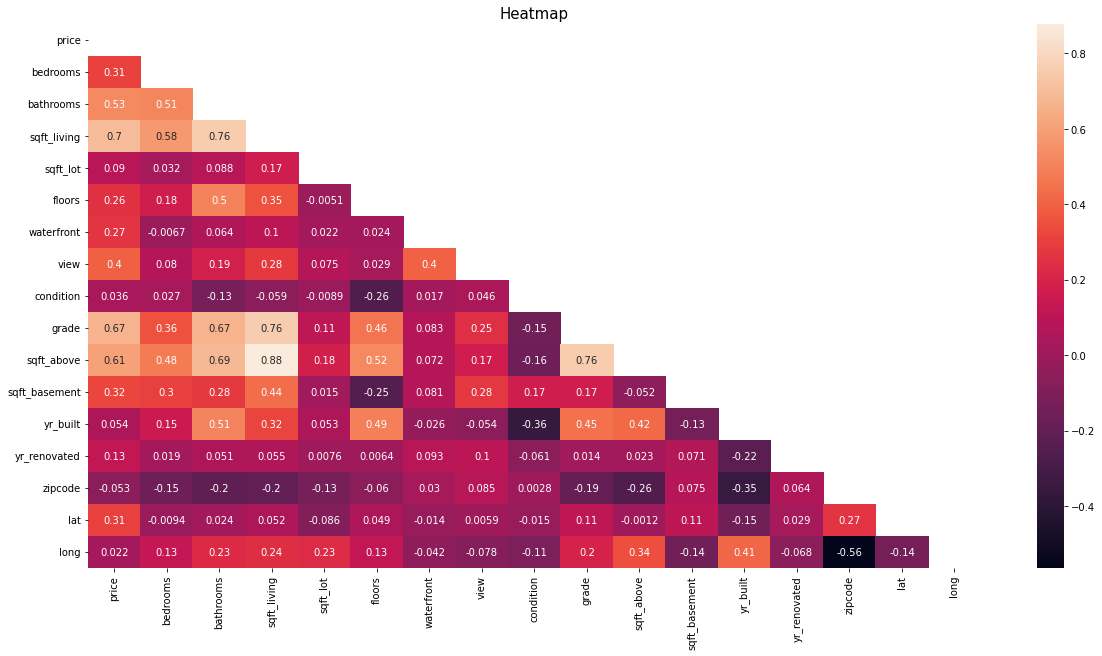

In [8]:
def data_copy(data):
    data_analysis = data.copy(deep=True)
    
    return data_analysis

def correlation_data(data_analysis):
    corr = data_analysis.drop(columns=['id', 'sqft_living15','sqft_lot15']).corr()
    
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    
    plt.figure(figsize=(20,10))
    ax = sns.heatmap(corr, mask = mask, annot = True)
    ax = plt.title("Heatmap", fontsize=15)
    ax = plt.xlabel("",fontsize=12)
    ax = plt.ylabel("",fontsize=12)
    
    return None

if __name__ == '__main__':
    data_analysis = data_copy(data)
    
    correlation_data(data_analysis)

From the heatmap above, the features which most correlate with the price of the properties are:

1. sqft_living: 0.70.
2. grade: 0.67.
3. sqft_above: 0.61.
4. bathrooms: 0.53.

The other features did not present significative correlation coefficient values.

## 2.2. Continuous features analysis 

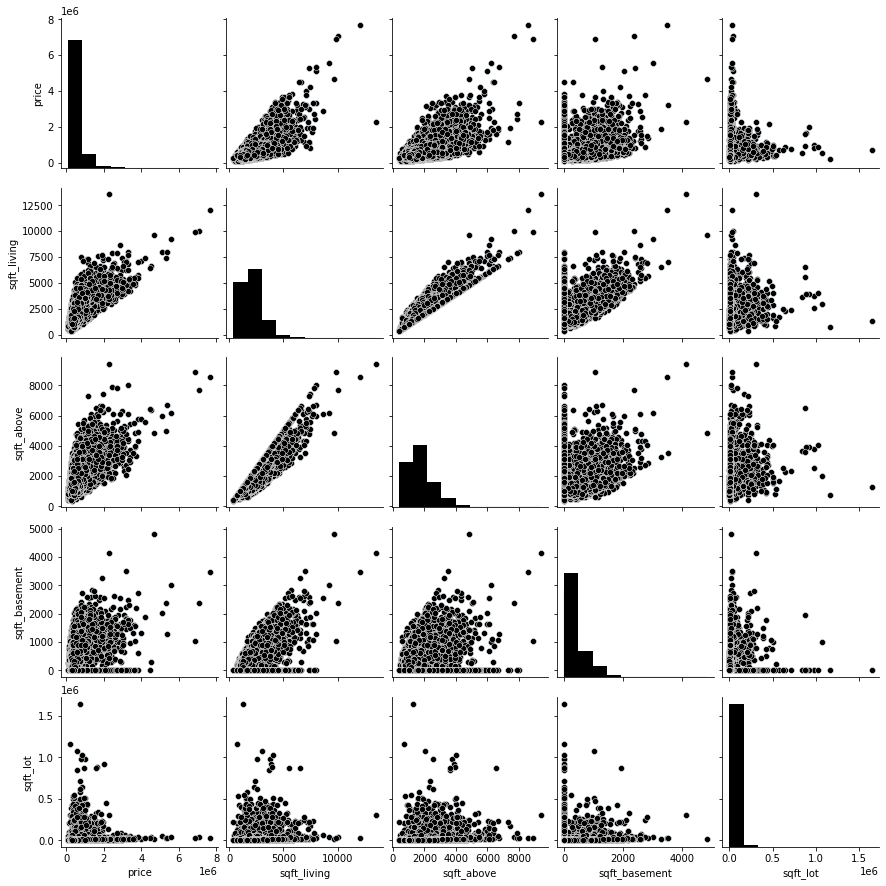

In [9]:
def price_distribution(data_analysis):
    fig = px.histogram(data_analysis, x= 'price', nbins = 80, color_discrete_sequence=['black'])
    fig.update_layout(title="Number of properties per price")
    fig.update_xaxes(title="Price (USD)")
    fig.update_yaxes(title="Absolute frequency (-)")
    
    fig.show()
    
    return None

def pairplot_analysis(data_analysis):
    ax = sns.pairplot(data_analysis[['price', 'sqft_living','sqft_above','sqft_basement','sqft_lot']])
    ax.map_upper(sns.scatterplot, color = 'black')
    ax.map_lower(sns.scatterplot, color = 'black')
    ax.map_diag(plt.hist, color = 'black')
    
    return None

if __name__ == '__main__':
    price_distribution(data_analysis)
    
    pairplot_analysis(data_analysis)

- We may look at **histogram** chart that the most properties are around 500,000 dollars. The majority of properties costs up to 1.0 million dollars and few properties almost reach the value of 8.0 million dollars.
- The feature with the best linear correlation with the price is sqft_living as its correlation coefficient is 0.70 (heatmap). When we check the **pairplot** chart, we notice that lower properties prices present better linear correlation and median area (sqft_living) values tend to disperse the points.
- sqft_living presents good linear correlation with sqft_above at the **pairplot** chart, since the sqft_above tends to represent the biggest portion to the sum: sqft_living = sqft_above + sqft_basement.
- The distributions tends to be a long right tail and they may be better analyzed visually by using different chart scales.

## 2.3. Discrete features analysis

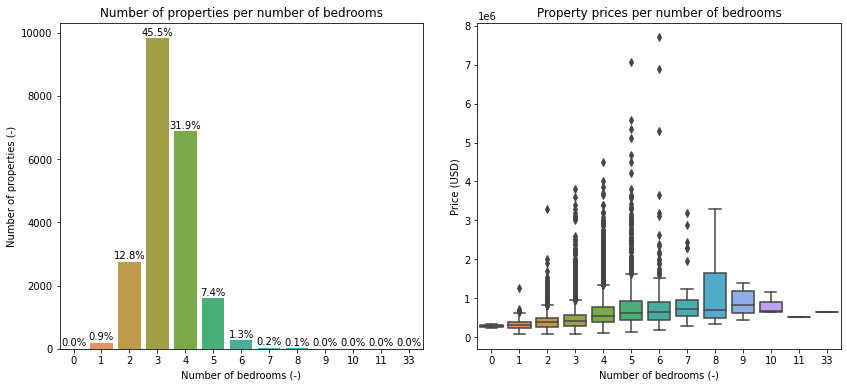

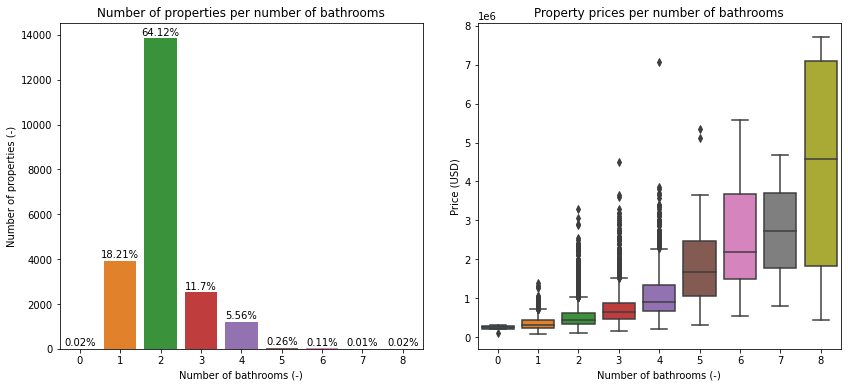

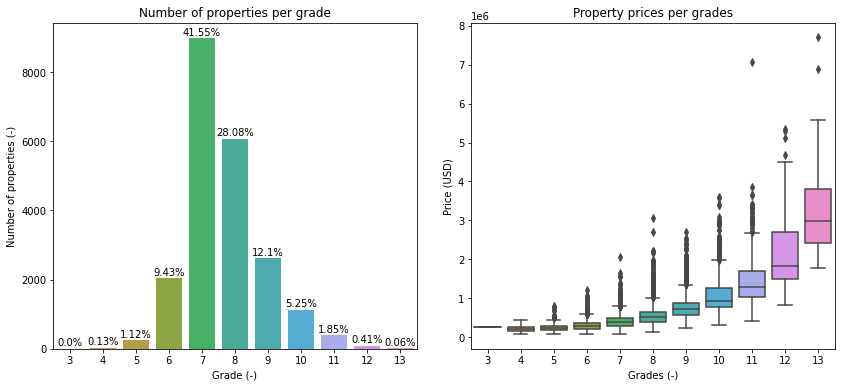

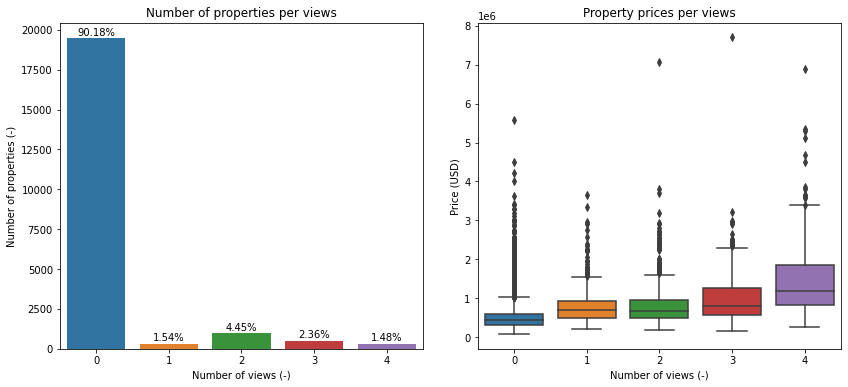

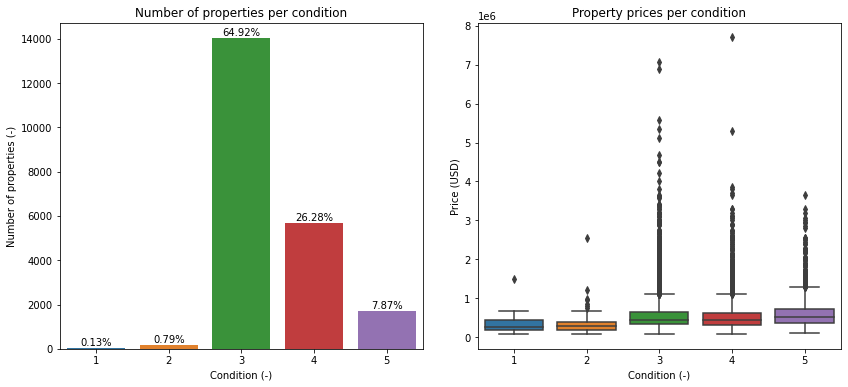

In [10]:
def bed_charts():
    plt.figure(figsize = (14,6))

    plt.subplot(121)
    ax1 = sns.countplot(x = 'bedrooms', data = data_analysis)
    for p in ax1.patches:
        ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(1)) + '%'), 
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', 
                    va='center', 
                    xytext=(0,6),
                    textcoords='offset points')
    ax1 = plt.title("Number of properties per number of bedrooms", fontsize=12)
    ax1 = plt.xlabel("Number of bedrooms (-)", fontsize=10)
    ax1 = plt.ylabel("Number of properties (-)", fontsize=10)
    
    plt.subplot(122)
    ax2 = sns.boxplot(x = 'bedrooms', y = 'price', data = data_analysis)
    ax2 = plt.title("Property prices per number of bedrooms", fontsize=12)
    ax2 = plt.xlabel("Number of bedrooms (-)", fontsize=10)
    ax2 = plt.ylabel("Price (USD)")
    
    plt.subplots_adjust(wspace = 0.15)
    plt.show()
    
    return None

def round_bath(data_analysis):
    bath = data_analysis['bathrooms'].round(0).astype(int)
    
    return bath

def bath_charts():
    plt.figure(figsize = (14,6))

    plt.subplot(121)
    ax1 = sns.countplot(x = bath)
    for p in ax1.patches:
        ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(2)) + '%'), 
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', 
                    va='center', 
                    xytext=(0,6),
                    textcoords='offset points')
    ax1 = plt.title("Number of properties per number of bathrooms", fontsize=12)
    ax1 = plt.xlabel("Number of bathrooms (-)", fontsize=10)
    ax1 = plt.ylabel("Number of properties (-)", fontsize=10)
    
    plt.subplot(122)
    ax2 = sns.boxplot(x = bath, y = 'price', data = data_analysis)
    ax2 = plt.title("Property prices per number of bathrooms", fontsize=12)
    ax2 = plt.xlabel("Number of bathrooms (-)", fontsize=10)
    ax2 = plt.ylabel("Price (USD)")
    
    plt.subplots_adjust(wspace = 0.15)
    plt.show()
    
    return None

def grade_charts():
    plt.figure(figsize = (14,6))

    plt.subplot(121)
    ax1 = sns.countplot(x = 'grade', data = data_analysis)
    for p in ax1.patches:
        ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(2)) + '%'), 
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', 
                    va='center', 
                    xytext=(0,6),
                    textcoords='offset points')
    ax1 = plt.title("Number of properties per grade", fontsize=12)
    ax1 = plt.xlabel("Grade (-)", fontsize=10)
    ax1 = plt.ylabel("Number of properties (-)", fontsize=10)
    
    plt.subplot(122)
    ax2 = sns.boxplot(x = 'grade', y = 'price', data = data_analysis)
    ax2 = plt.title("Property prices per grades", fontsize=12)
    ax2 = plt.xlabel("Grades (-)", fontsize=10)
    ax2 = plt.ylabel("Price (USD)")
    
    plt.subplots_adjust(wspace = 0.15)
    plt.show()

    return None

def view_charts():
    plt.figure(figsize = (14,6))

    plt.subplot(121)
    ax1 = sns.countplot(x = 'view', data = data_analysis)
    for p in ax1.patches:
        ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(2)) + '%'), 
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', 
                    va='center', 
                    xytext=(0,6),
                    textcoords='offset points')
    ax1 = plt.title("Number of properties per views", fontsize=12)
    ax1 = plt.xlabel("Number of views (-)", fontsize=10)
    ax1 = plt.ylabel("Number of properties (-)", fontsize=10)
    
    plt.subplot(122)
    ax2 = sns.boxplot(x = 'view', y = 'price', data = data_analysis)
    ax2 = plt.title("Property prices per views", fontsize=12)
    ax2 = plt.xlabel("Number of views (-)", fontsize=10)
    ax2 = plt.ylabel("Price (USD)")
    
    plt.subplots_adjust(wspace = 0.15)
    plt.show()
    
    return None

def sort_condition(data_analysis):
    cond = data_analysis.sort_values('condition', ascending=True)
    
    return cond

def condition_charts():    
    plt.figure(figsize = (14,6))

    plt.subplot(121)
    ax1 = sns.countplot(x = 'condition', data = cond)
    for p in ax1.patches:
        ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(2)) + '%'), 
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', 
                    va='center', 
                    xytext=(0,6),
                    textcoords='offset points')
    ax1 = plt.title("Number of properties per condition", fontsize=12)
    ax1 = plt.xlabel("Condition (-)", fontsize=10)
    ax1 = plt.ylabel("Number of properties (-)", fontsize=10)
    
    plt.subplot(122)
    ax2 = sns.boxplot(x = 'condition', y = 'price', data = cond)
    ax2 = plt.title("Property prices per condition", fontsize=12)
    ax2 = plt.xlabel("Condition (-)", fontsize=10)
    ax2 = plt.ylabel("Price (USD)")
    
    plt.subplots_adjust(wspace = 0.15)
    plt.show()
    
    return None

if __name__ == '__main__':
    bed_charts()
    
    bath = round_bath(data_analysis)
    
    bath_charts()
    
    grade_charts()
    
    view_charts()
    
    cond = sort_condition(data_analysis)
    
    condition_charts()

1. **Bedrooms -** The number of properties per bedrooms is a normal distribution, which indicates randomness. The most properties have 3 (45.5 %) or 4 (31.9 %) bedrooms. The minority of properties have 0, 1 or more than 6 bedrooms. The median price slightly increases with the number of bedrooms. However, the median property price for those with more than 4 bedrooms did not present significative fluctuation. There is no outliers for properties with 0 or more than 7 bedrooms. This may be caused by their reduced number of properties.
2. **Bathrooms -** The number of properties per bathrooms is also a normal distribution. The most properties have 2 bathrooms (64.12 %) and few properties have more than 4 bathrooms. There is no property with 0 bathrooms, since they were deleted in the data cleaning section. Nonetheless, it is possible to see the box for 0 bathrooms because the function ".round()" gave us the rounding down of the 0.5 bathroom. The median price is clearly influenced by the number of bathrooms.
3. **Grades -** The number of properties per grades also follows a normal distribution. Most grades are 7 (41.55 %) or 8 (28.08 %). The median price is influenced by the grade.
4. **Views -** The number properties per views does not follow a normal distribution, since the 0-views bar is the highest and it is located at the far left end. This indicates that the number of views is not random. Since the most properties have 0 views (90.18 %), they are the most sold. As the median price almost does not vary with the number of views (around 1.0 million dollars), it is possible that the construction companies prefer to build properties located at places with no views.
5. **Condition -** The number of properties per condition follows a normal distribution. Most properties have condition equals 3 (64.92%). Few properties have condition equals 1 (0.13%) or 2 (0.79%). The median price almost does not fluctuate for properties with condition higher than 3.

# 3. Assumptions Test (Hypothesis Test) 

**Assumptions (hypothesis)** were formulated in order to be tested.

1. Properties **located in Seattle** are **5% more expensive**, on median, than those located in other cities;
2. Properties with **basement** are **20% more expensive**, on median, than those without basement;
3. Properties which were **renovated after 2000's** are **45% more expensive**, on median, than those without renovation and **20% more expensive**, on median, than those renovated before 2000's;
4. Properties **constructed after 2000's** are 2% cheaper, on median;
5. The property **prices are related to the day of week, to the month, to the year and to the season**.

We may easily find the zipcodes inside Seattle on Google. They are:

 [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98111, 98112, 98113, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 98126, 98127, 98129, 98131, 98132, 98133, 98134, 98136, 98139, 98141, 98144, 98145, 98146, 98154, 98161, 98164, 98165, 98170, 98174, 98175, 98177, 98178, 98181, 98185, 98190, 98191, 98194, 98195, 98199] 




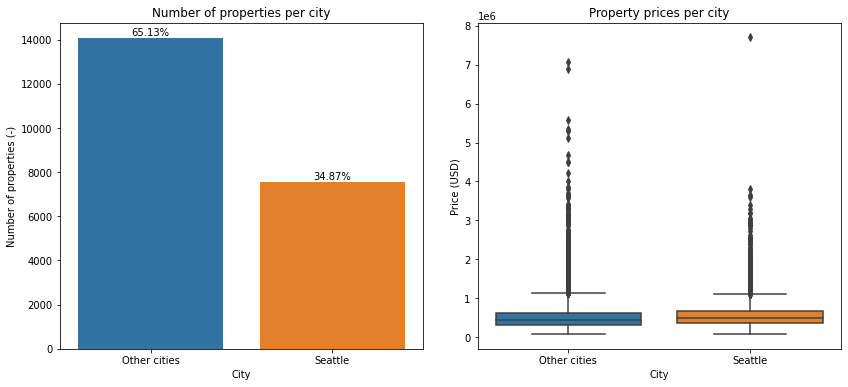



             Median price (USD)
In Seattle                    
0                    430000.00
1                    490000.00

Properties in Seattle are 13.95% more expensive, on median, than those outside.




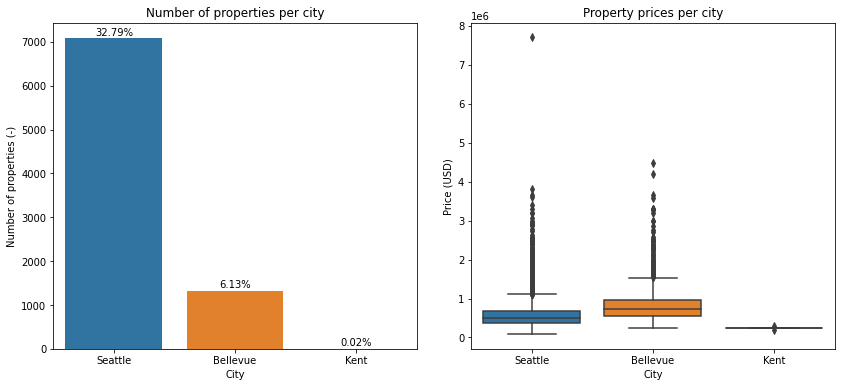



           Median price (USD)
Cities                      
Bellevue           725000.00
Kent               234000.00
Seattle            499000.00

Properties in Seattle are -31.17% cheaper, on median, than those in Bellevue.

Properties in Seattle are 113.25% more expensive, on median, than those in Kent.




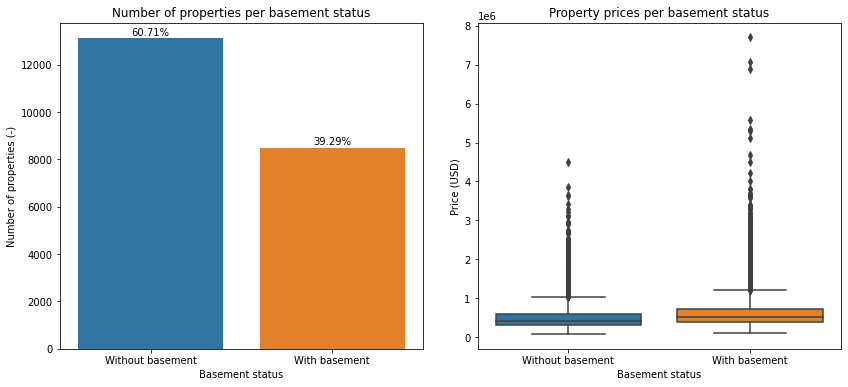



                  Median price (USD)
Basement status                    
0                         411679.00
1                         515000.00

Properties with basement are 25.1% more expensive, on median, than those without.




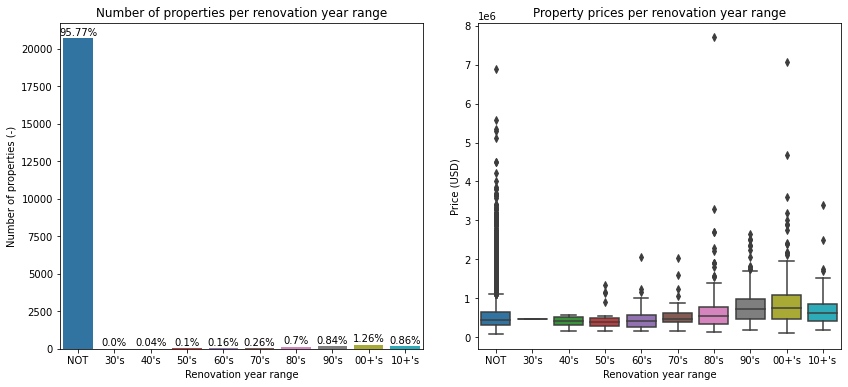



                        Median price (USD)
Renovation year range                    
0                               448000.00
1                               459950.00
2                               410000.00
3                               397440.00
4                               400000.00
5                               463277.50
6                               533000.00
7                               711250.00
8                               747000.00
9                               604500.00

Properties renovated in 2010 are -19.08% cheaper, on median, than those renovated in 2000's.

Properties renovated in 2010 are -15.01% cheaper, on median, than those renovated in 90's.

Properties renovated in 2010 are 13.41% more expensive, on median, than those renovated in 80's.

Properties renovated in 2010 are 30.48% more expensive, on median, than those renovated in 70's.

Properties renovated in 2010 are 51.12% more expensive, on median, than those renovated in 60's.

Properties r

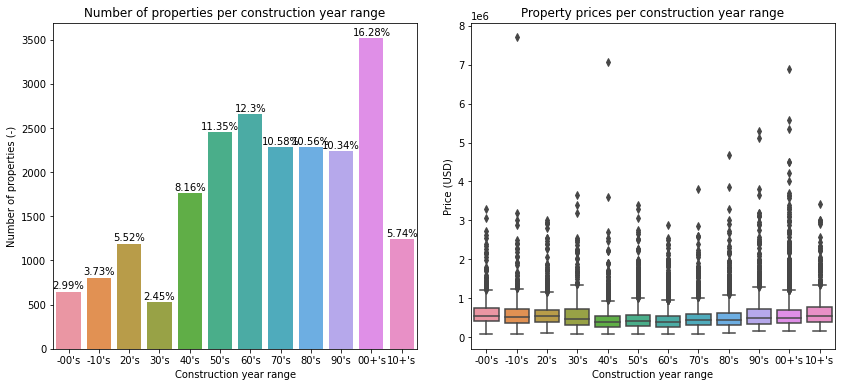



                          Median price (USD)
Construction year range                    
0                                 550000.00
1                                 511500.00
2                                 535000.00
3                                 474000.00
4                                 389000.00
5                                 400000.00
6                                 380000.00
7                                 436500.00
8                                 450000.00
9                                 486387.50
10                                495500.00
11                                539950.00

Properties constructed in 2010's are 8.97% more expensive, on median, than those constructed in 2000's.

Properties constructed in 2010's are 11.01% more expensive, on median, than those constructed in 90's.

Properties constructed in 2010's are 19.99% more expensive, on median, than those constructed in 80's.

Properties constructed in 2010's are 23.7% more expensive, on media

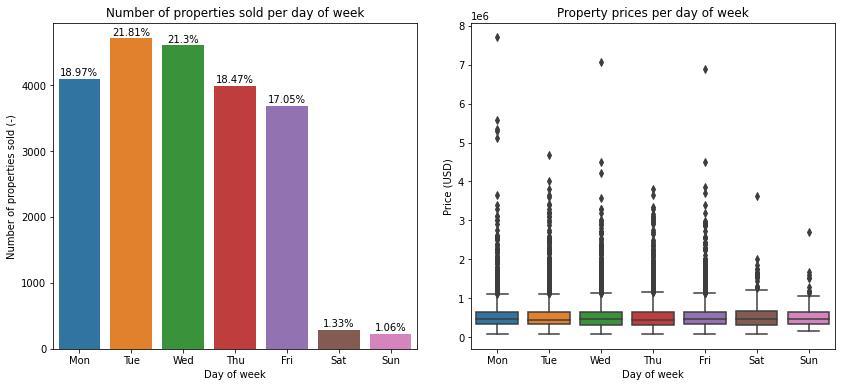

             Median price (USD)
Day of Week                    
0                     453000.00
1                     449950.00
2                     453250.00
3                     442500.00
4                     455000.00
5                     475000.00
6                     471250.00

Saturday and sunday are the days which properties are least purchased. Each one has 1.33% and 1.06% of total sales, respectively.

Even so, they have have the highest median prices which are $475000.0 and $471250.0, respectively.




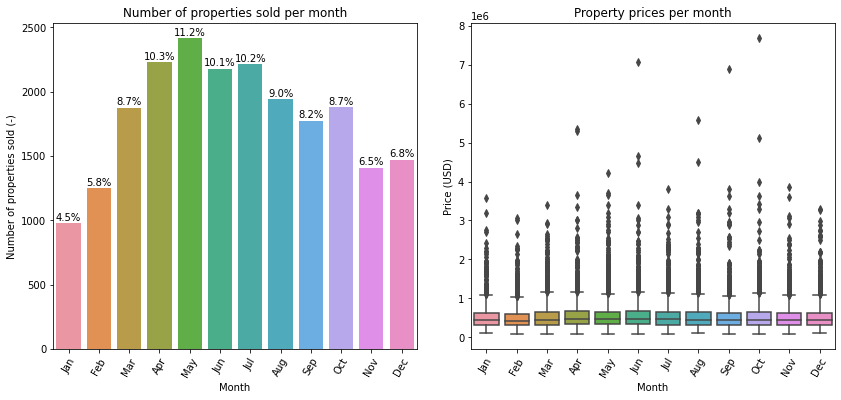

       Median price (USD)
Month                    
1               438500.00
2               426045.00
3               450000.00
4               477000.00
5               462000.00
6               465000.00
7               465000.00
8               442100.00
9               450000.00
10              446900.00
11              435000.00
12              432500.00

The month with the smallest number of properties sold is January (4.5%) and the highest is May (11.2%).

The lowest median price is for February: $426045.0.

The highest median price is for April: $477000.0.




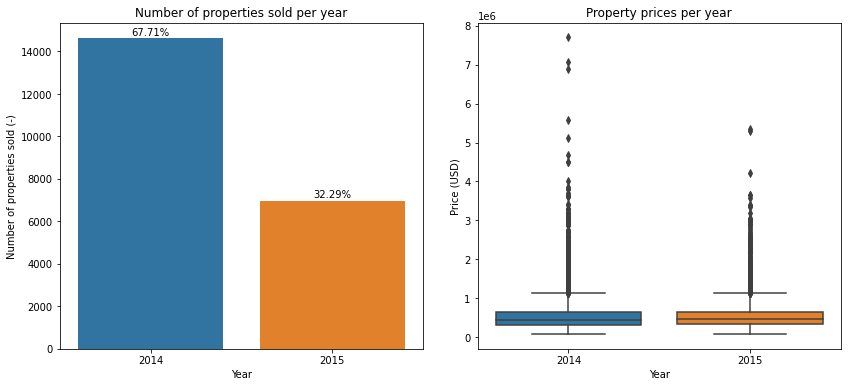

      Median price (USD)
Year                    
2014           450000.00
2015           450800.00

Due to the available sales period in the dataset (May-2014 to May-2015), most properties were sold in 2014 (67.71%).

Yet, the median price almost did not vary from one year to the other.




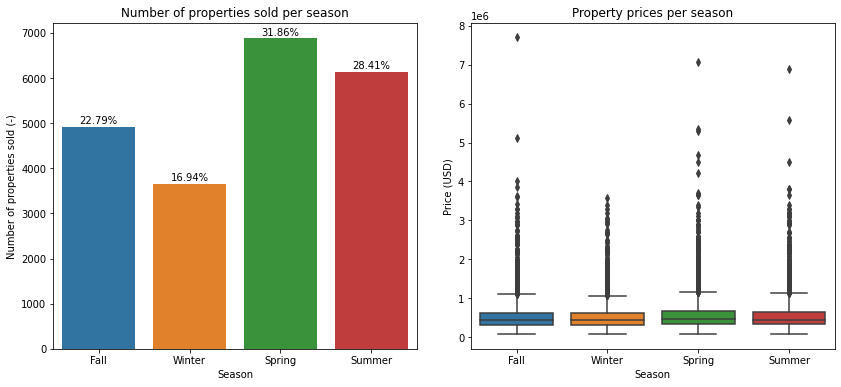

        Median price (USD)
Season                    
Fall             438100.00
Spring           470000.00
Summer           450000.00
Winter           435000.00

The lowest median price is for winter: $435000.0. Winter is the season which properties were least sold (16.94%).

The highest median price is for spring: $470000.0. Spring is also the season which properties were most sold (31.86%).




In [11]:
def zipcode_seattle():
  seattle = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108,
             98109, 98111, 98112, 98113, 98114, 98115, 98116, 98117, 
             98118, 98119, 98121, 98122, 98124, 98125, 98126, 98127,
             98129, 98131, 98132, 98133, 98134, 98136, 98139, 98141,
             98144, 98145, 98146, 98154, 98161, 98164, 98165, 98170,
             98174, 98175, 98177, 98178, 98181, 98185, 98190, 98191,
             98194, 98195, 98199]

  data_analysis['in_city'] = (data_analysis['zipcode'].isin(seattle)).astype(int)

  print("We may easily find the zipcodes inside Seattle on Google. They are:\n\n",seattle,"\n\n")

  return data_analysis

def hypothesis_one(data_analysis):
  plt.figure(figsize = (14,6))

  plt.subplot(121)
  ax1 = sns.countplot(x = 'in_city', data = data_analysis)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(2)) + '%'), 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0,6),
                textcoords='offset points')
  ax1 = plt.title("Number of properties per city", fontsize=12)
  ax1 = plt.xlabel("City", fontsize=10)
  ax1 = plt.ylabel("Number of properties (-)", fontsize=10)
  ax1 = plt.xticks(np.arange(2), ('Other cities', 'Seattle'))
    
  plt.subplot(122)
  ax2 = sns.boxplot(x = 'in_city', y = 'price', data = data_analysis)
  ax2 = plt.title("Property prices per city", fontsize=12)
  x2 = plt.xlabel("City", fontsize=10)
  ax2 = plt.ylabel("Price (USD)")
  ax2 = plt.xticks(np.arange(2), ('Other cities', 'Seattle'))
    
  plt.subplots_adjust(wspace = 0.15)
  plt.show()
    
  return None

def descriptive_seattle(data_analysis):
    median_price = data_analysis[['price','in_city']].groupby('in_city').median()
    median_price.rename(columns={'price':'Median price (USD)'}, inplace=True)
    median_price.index.name = 'In Seattle'
    median_rel = ((median_price.iloc[1][0] - median_price.iloc[0][0])*(100/median_price.iloc[0][0])).round(2)
    
    print("\n\n",median_price)
    
    print(f"\nProperties in Seattle are {median_rel}% more expensive, on median, than those outside.\n\n")
    
    return median_price

def test_cities(data_cities):
  plt.figure(figsize = (14,6))

  plt.subplot(121)
  ax1 = sns.countplot(x = 'city', data = data_cities)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(2)) + '%'), 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0,6),
                textcoords='offset points')
  ax1 = plt.title("Number of properties per city", fontsize=12)
  ax1 = plt.xlabel("City", fontsize=10)
  ax1 = plt.ylabel("Number of properties (-)", fontsize=10)
    
  plt.subplot(122)
  ax2 = sns.boxplot(x = 'city', y = 'price', data = data_cities)
  ax2 = plt.title("Property prices per city", fontsize=12)
  x2 = plt.xlabel("City", fontsize=10)
  ax2 = plt.ylabel("Price (USD)")
    
  plt.subplots_adjust(wspace = 0.15)
  plt.show()

  return None

def descriptive_cities(data_cities):
  median_price = data_cities[['price','city']].groupby('city').median()
  median_price.rename(columns={'price':'Median price (USD)'}, inplace=True)
  median_price.index.name = 'Cities'
  
  median_rel1 = ((median_price.iloc[2][0] - median_price.iloc[0][0])*(100/median_price.iloc[0][0])).round(2)
  median_rel2 = ((median_price.iloc[2][0] - median_price.iloc[1][0])*(100/median_price.iloc[1][0])).round(2)
    
  print("\n\n",median_price)
    
  print(f"\nProperties in Seattle are {median_rel1}% cheaper, on median, than those in Bellevue.")
  print(f"\nProperties in Seattle are {median_rel2}% more expensive, on median, than those in Kent.\n\n")
    
  return median_price  

def encoding_basement(data_analysis):
  data_analysis['basement'] = (data_analysis['sqft_basement'] > 0).astype(int)

  return data_analysis

def hypothesis_two(data_analysis):
  plt.figure(figsize = (14,6))

  plt.subplot(121)
  ax1 = sns.countplot(x = 'basement', data = data_analysis)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(2)) + '%'), 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0,6),
                textcoords='offset points')
  ax1 = plt.title("Number of properties per basement status", fontsize=12)
  ax1 = plt.xlabel("Basement status", fontsize=10)
  ax1 = plt.ylabel("Number of properties (-)", fontsize=10)
  ax1 = plt.xticks(np.arange(2), ('Without basement', 'With basement'))
    
  plt.subplot(122)
  ax2 = sns.boxplot(x = 'basement', y = 'price', data = data_analysis)
  ax2 = plt.title("Property prices per basement status", fontsize=12)
  x2 = plt.xlabel("Basement status", fontsize=10)
  ax2 = plt.ylabel("Price (USD)")
  ax2 = plt.xticks(np.arange(2), ('Without basement', 'With basement'))
    
  plt.subplots_adjust(wspace = 0.15)
  plt.show()
    
  return None

def descriptive_basement(data_analysis):
    median_price = data_analysis[['price','basement']].groupby('basement').median()
    median_price.rename(columns={'price':'Median price (USD)'}, inplace=True)
    median_price.index.name = 'Basement status'
    median_rel = ((median_price.iloc[1][0] - median_price.iloc[0][0])*(100/median_price.iloc[0][0])).round(2)
    
    print("\n\n",median_price)
    
    print(f"\nProperties with basement are {median_rel}% more expensive, on median, than those without.\n\n")
    
    return median_price

def encoding_renovation(data_analysis):
  for i in range (len(data_analysis)):      
        if data_analysis.loc[i, 'yr_renovated'] >= 2010:
            data_analysis.loc[i, 'renovation'] = 9

        elif (data_analysis.loc[i, 'yr_renovated'] >= 2000) & (data_analysis.loc[i, 'yr_renovated'] < 2010):
            data_analysis.loc[i, 'renovation'] = 8
        
        elif (data_analysis.loc[i, 'yr_renovated'] >= 1990) & (data_analysis.loc[i, 'yr_renovated'] < 2000):
            data_analysis.loc[i, 'renovation'] = 7
        
        elif (data_analysis.loc[i, 'yr_renovated'] >= 1980) & (data_analysis.loc[i, 'yr_renovated'] < 1990):
            data_analysis.loc[i, 'renovation'] = 6

        elif (data_analysis.loc[i, 'yr_renovated'] >= 1970) & (data_analysis.loc[i, 'yr_renovated'] < 1980):
            data_analysis.loc[i, 'renovation'] = 5

        elif (data_analysis.loc[i, 'yr_renovated'] >= 1960) & (data_analysis.loc[i, 'yr_renovated'] < 1970):
            data_analysis.loc[i, 'renovation'] = 4

        elif (data_analysis.loc[i, 'yr_renovated'] >= 1950) & (data_analysis.loc[i, 'yr_renovated'] < 1960):
            data_analysis.loc[i, 'renovation'] = 3

        elif (data_analysis.loc[i, 'yr_renovated'] >= 1940) & (data_analysis.loc[i, 'yr_renovated'] < 1950):
            data_analysis.loc[i, 'renovation'] = 2    
            
        elif (data_analysis.loc[i, 'yr_renovated'] >= 1930) & (data_analysis.loc[i, 'yr_renovated'] < 1940):
            data_analysis.loc[i, 'renovation'] = 1    

        elif data_analysis.loc[i, 'yr_renovated'] == 0: 
            data_analysis.loc[i, 'renovation'] = 0
            
  data_analysis['renovation'] = data_analysis['renovation'].astype(int)

  return data_analysis

def hypothesis_three(data_analysis):
  plt.figure(figsize = (14,6))

  plt.subplot(121)
  ax1 = sns.countplot(x = 'renovation', data = data_analysis)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(2)) + '%'), 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0,6),
                textcoords='offset points')
  ax1 = plt.title("Number of properties per renovation year range", fontsize=12)
  ax1 = plt.xlabel("Renovation year range", fontsize=10)
  ax1 = plt.ylabel("Number of properties (-)", fontsize=10)
  ax1 = plt.xticks(np.arange(10), ("NOT","30's","40's","50's", "60's", "70's", "80's", "90's", "00+'s","10+'s"))
    
  plt.subplot(122)
  ax2 = sns.boxplot(x = 'renovation', y = 'price', data = data_analysis)
  ax2 = plt.title("Property prices per renovation year range", fontsize=12)
  x2 = plt.xlabel("Renovation year range", fontsize=10)
  ax2 = plt.ylabel("Price (USD)")
  ax2 = plt.xticks(np.arange(10), ("NOT","30's","40's","50's", "60's", "70's", "80's", "90's", "00+'s","10+'s"))
    
  plt.subplots_adjust(wspace = 0.15)
  plt.show()
    
  return None

def descriptive_renovation(data_analysis):
    median_price = data_analysis[['price','renovation']].groupby('renovation').median()
    median_price.rename(columns={'price':'Median price (USD)'}, inplace=True)
    median_price.index.name = 'Renovation year range'
  
    median_rel9 = ((median_price.iloc[9][0] - median_price.iloc[8][0])*(100/median_price.iloc[8][0])).round(2)
    median_rel8 = ((median_price.iloc[9][0] - median_price.iloc[7][0])*(100/median_price.iloc[7][0])).round(2)
    median_rel7 = ((median_price.iloc[9][0] - median_price.iloc[6][0])*(100/median_price.iloc[6][0])).round(2)
    median_rel6 = ((median_price.iloc[9][0] - median_price.iloc[5][0])*(100/median_price.iloc[5][0])).round(2)
    median_rel5 = ((median_price.iloc[9][0] - median_price.iloc[4][0])*(100/median_price.iloc[4][0])).round(2)
    median_rel4 = ((median_price.iloc[9][0] - median_price.iloc[3][0])*(100/median_price.iloc[3][0])).round(2)
    median_rel3 = ((median_price.iloc[9][0] - median_price.iloc[2][0])*(100/median_price.iloc[2][0])).round(2)
    median_rel2 = ((median_price.iloc[9][0] - median_price.iloc[1][0])*(100/median_price.iloc[1][0])).round(2)
    median_rel1 = ((median_price.iloc[9][0] - median_price.iloc[0][0])*(100/median_price.iloc[0][0])).round(2)
    
    print("\n\n",median_price)
    
    print(f"\nProperties renovated in 2010 are {median_rel9}% cheaper, on median, than those renovated in 2000's.")
    print(f"\nProperties renovated in 2010 are {median_rel8}% cheaper, on median, than those renovated in 90's.")
    print(f"\nProperties renovated in 2010 are {median_rel7}% more expensive, on median, than those renovated in 80's.")
    print(f"\nProperties renovated in 2010 are {median_rel6}% more expensive, on median, than those renovated in 70's.")
    print(f"\nProperties renovated in 2010 are {median_rel5}% more expensive, on median, than those renovated in 60's.")
    print(f"\nProperties renovated in 2010 are {median_rel4}% more expensive, on median, than those renovated in 50's.")
    print(f"\nProperties renovated in 2010 are {median_rel3}% more expensive, on median, than those renovated in 40's.")
    print(f"\nProperties renovated in 2010 are {median_rel2}% more expensive, on median, than those renovated in 30's.")
    print(f"\nProperties renovated in 2010 are {median_rel1}% more expensive, on median, than those which were NOT renovated.\n\n")

    return median_price

def encoding_construction(data_analysis):
  for i in range (len(data_analysis)):
        if data_analysis.loc[i, 'yr_built'] >= 2010:
            data_analysis.loc[i, 'construction'] = 11

        elif (data_analysis.loc[i, 'yr_built'] < 2010) & (data_analysis.loc[i, 'yr_built'] >= 2000):
            data_analysis.loc[i, 'construction'] = 10
        
        elif (data_analysis.loc[i, 'yr_built'] < 2000) & (data_analysis.loc[i, 'yr_built'] >= 1990):
            data_analysis.loc[i, 'construction'] = 9

        elif (data_analysis.loc[i, 'yr_built'] < 1990) & (data_analysis.loc[i, 'yr_built'] >= 1980):
            data_analysis.loc[i, 'construction'] = 8

        elif (data_analysis.loc[i, 'yr_built'] < 1980) & (data_analysis.loc[i, 'yr_built'] >= 1970):
            data_analysis.loc[i, 'construction'] = 7

        elif (data_analysis.loc[i, 'yr_built'] < 1970) & (data_analysis.loc[i, 'yr_built'] >= 1960):
            data_analysis.loc[i, 'construction'] = 6

        elif (data_analysis.loc[i, 'yr_built'] < 1960) & (data_analysis.loc[i, 'yr_built'] >= 1950):
            data_analysis.loc[i, 'construction'] = 5

        elif (data_analysis.loc[i, 'yr_built'] < 1950) & (data_analysis.loc[i, 'yr_built'] >= 1940):
            data_analysis.loc[i, 'construction'] = 4    
            
        elif (data_analysis.loc[i, 'yr_built'] < 1940) & (data_analysis.loc[i, 'yr_built'] >= 1930):
            data_analysis.loc[i, 'construction'] = 3

        elif (data_analysis.loc[i, 'yr_built'] < 1930) & (data_analysis.loc[i, 'yr_built'] >= 1920):
            data_analysis.loc[i, 'construction'] = 2

        elif (data_analysis.loc[i, 'yr_built'] < 1920) & (data_analysis.loc[i, 'yr_built'] >= 1910):
            data_analysis.loc[i, 'construction'] = 1    

        else:
            data_analysis.loc[i, 'construction'] = 0
            
  data_analysis['construction'] = data_analysis['construction'].astype(int)

  return data_analysis

def hypothesis_four(data_analysis):
  plt.figure(figsize = (14,6))

  plt.subplot(121)
  ax1 = sns.countplot(x = 'construction', data = data_analysis)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(2)) + '%'), 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0,6),
                textcoords='offset points')
  ax1 = plt.title("Number of properties per construction year range", fontsize=12)
  ax1 = plt.xlabel("Construction year range", fontsize=10)
  ax1 = plt.ylabel("Number of properties (-)", fontsize=10)
  ax1 = plt.xticks(np.arange(12), ("-00's","-10's","20's","30's","40's","50's", "60's", "70's", "80's", "90's", "00+'s", "10+'s"))
    
  plt.subplot(122)
  ax2 = sns.boxplot(x = 'construction', y = 'price', data = data_analysis)
  ax2 = plt.title("Property prices per construction year range", fontsize=12)
  x2 = plt.xlabel("Construction year range", fontsize=10)
  ax2 = plt.ylabel("Price (USD)")
  ax2 = plt.xticks(np.arange(12), ("-00's","-10's","20's","30's","40's","50's", "60's", "70's", "80's", "90's", "00+'s", "10+'s"))
    
  plt.subplots_adjust(wspace = 0.15)
  plt.show()

  return None

def descriptive_construction(data_analysis):
    median_price = data_analysis[['price','construction']].groupby('construction').median()
    median_price.rename(columns={'price':'Median price (USD)'}, inplace=True)
    median_price.index.name = 'Construction year range'
    
    median_rel11 = ((median_price.iloc[11][0] - median_price.iloc[10][0])*(100/median_price.iloc[10][0])).round(2)
    median_rel10 = ((median_price.iloc[11][0] - median_price.iloc[9][0])*(100/median_price.iloc[9][0])).round(2)
    median_rel9 = ((median_price.iloc[11][0] - median_price.iloc[8][0])*(100/median_price.iloc[8][0])).round(2)
    median_rel8 = ((median_price.iloc[11][0] - median_price.iloc[7][0])*(100/median_price.iloc[7][0])).round(2)
    median_rel7 = ((median_price.iloc[11][0] - median_price.iloc[6][0])*(100/median_price.iloc[6][0])).round(2)
    median_rel6 = ((median_price.iloc[11][0] - median_price.iloc[5][0])*(100/median_price.iloc[5][0])).round(2)
    median_rel5 = ((median_price.iloc[11][0] - median_price.iloc[4][0])*(100/median_price.iloc[4][0])).round(2)
    median_rel4 = ((median_price.iloc[11][0] - median_price.iloc[3][0])*(100/median_price.iloc[3][0])).round(2)
    median_rel3 = ((median_price.iloc[11][0] - median_price.iloc[2][0])*(100/median_price.iloc[2][0])).round(2)
    median_rel2 = ((median_price.iloc[11][0] - median_price.iloc[1][0])*(100/median_price.iloc[1][0])).round(2)
    median_rel1 = ((median_price.iloc[11][0] - median_price.iloc[0][0])*(100/median_price.iloc[0][0])).round(2)
    
    print("\n\n",median_price)
    
    print(f"\nProperties constructed in 2010's are {median_rel11}% more expensive, on median, than those constructed in 2000's.")
    print(f"\nProperties constructed in 2010's are {median_rel10}% more expensive, on median, than those constructed in 90's.")
    print(f"\nProperties constructed in 2010's are {median_rel9}% more expensive, on median, than those constructed in 80's.")
    print(f"\nProperties constructed in 2010's are {median_rel8}% more expensive, on median, than those constructed in 70's.")
    print(f"\nProperties constructed in 2010's are {median_rel7}% more expensive, on median, than those constructed in 60's.")
    print(f"\nProperties constructed in 2010's are {median_rel6}% more expensive, on median, than those constructed in 50's.")
    print(f"\nProperties constructed in 2010's are {median_rel5}% more expensive, on median, than those constructed in 40's.")
    print(f"\nProperties constructed in 2010's are {median_rel4}% more expensive, on median, than those constructed in 30's.")
    print(f"\nProperties constructed in 2010's are {median_rel3}% more expensive, on median, than those constructed in 20's.")
    print(f"\nProperties constructed in 2010's are {median_rel2}% more expensive, on median, than those constructed in 10's.")
    print(f"\nProperties constructed in 2010's are {median_rel1}% cheaper, on median, than those constructed in 1900's.\n\n")
    
    return median_price

def separate_period(data_analysis):
  data_analysis['dayofweek'] = data_analysis['date'].dt.dayofweek
  data_analysis['month'] = data_analysis['date'].dt.month
  data_analysis['year'] = data_analysis['date'].dt.year
  
  data_analy = data_analysis.copy()
  data_analy['date'] = pd.to_datetime(data_analy['date']).dt.strftime('%m-%d')
  for i in range(len(data_analy)):
      if (data_analy.loc[i,'date'] >= '03-20') & (data_analy.loc[i,'date'] < '06-21'):
          data_analy.loc[i,'season'] = 'Spring'

      elif (data_analy.loc[i,'date'] >= '06-21') & (data_analy.loc[i,'date'] < '09-23'):
          data_analy.loc[i,'season'] = 'Summer'

      elif (data_analy.loc[i,'date'] >= '09-23') & (data_analy.loc[i,'date'] < '12-22'):
          data_analy.loc[i,'season'] = 'Fall'
        
      else:
          data_analy.loc[i,'season'] = 'Winter'

  data_analysis['season'] = data_analy['season']

  return data_analysis, data_analy

def hypothesis_dayofweek(data_analysis):
  plt.figure(figsize = (14,6))

  plt.subplot(121)
  ax1 = sns.countplot(x = 'dayofweek', data = data_analysis)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(2)) + '%'), 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0,6),
                textcoords='offset points')
  ax1 = plt.title("Number of properties sold per day of week", fontsize=12)
  ax1 = plt.xlabel("Day of week", fontsize=10)
  ax1 = plt.ylabel("Number of properties sold (-)", fontsize=10)
  ax1 = plt.xticks(np.arange(7), ('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
    
  plt.subplot(122)
  ax2 = sns.boxplot(x = 'dayofweek', y = 'price', data = data_analysis)
  ax2 = plt.title("Property prices per day of week", fontsize=12)
  ax2 = plt.xlabel("Day of week", fontsize=10)
  ax2 = plt.ylabel("Price (USD)")
  ax2 = plt.xticks(np.arange(7), ('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))

  plt.subplots_adjust(wspace = 0.15)
  plt.show()

  return None

def descriptive_dayofweek(data_analysis):
  median_price = data_analysis[['price','dayofweek']].groupby('dayofweek').median()
  median_price.rename(columns={'price':'Median price (USD)'}, inplace=True)
  median_price.index.name = 'Day of Week'

  print(median_price)

  print("\nSaturday and sunday are the days which properties are least purchased. Each one has 1.33% and 1.06% of total sales, respectively.\n") 
  print(f"Even so, they have have the highest median prices which are ${median_price.iloc[5][0]} and ${median_price.iloc[6][0]}, respectively.\n\n")

  return median_price

def hypothesis_month(data_analysis):
  plt.figure(figsize = (14,6))
  
  plt.subplot(121)
  ax1 = sns.countplot(x = 'month', data = data_analysis)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(1)) + '%'), 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0,6),
                textcoords='offset points')
  ax1 = plt.title("Number of properties sold per month", fontsize=12)
  ax1 = plt.xlabel("Month", fontsize=10)
  ax1 = plt.ylabel("Number of properties sold (-)", fontsize=10)
  ax1 = plt.xticks(np.arange(12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
  ax1 = plt.xticks(rotation=60)  

  plt.subplot(122)
  ax2 = sns.boxplot(x = 'month', y = 'price', data = data_analysis)
  ax2 = plt.title("Property prices per month", fontsize=12)
  ax2 = plt.xlabel("Month", fontsize=10)
  ax2 = plt.ylabel("Price (USD)")
  ax2 = plt.xticks(np.arange(12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
  ax2 = plt.xticks(rotation=60)
  
  plt.subplots_adjust(wspace = 0.15)
  plt.show()

  return None

def descriptive_month(data_analysis):
  median_price = data_analysis[['price','month']].groupby('month').median()
  median_price.rename(columns={'price':'Median price (USD)'}, inplace=True)
  median_price.index.name = 'Month'

  print(median_price)

  print("\nThe month with the smallest number of properties sold is January (4.5%) and the highest is May (11.2%).\n")
  print(f"The lowest median price is for February: ${median_price.iloc[1][0]}.\n")
  print(f"The highest median price is for April: ${median_price.iloc[3][0]}.\n\n")

  return median_price

def hypothesis_year(data_analysis):
  plt.figure(figsize = (14,6))
  
  plt.subplot(121)
  ax1 = sns.countplot(x = 'year', data = data_analysis)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(2)) + '%'), 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0,6),
                textcoords='offset points')
  ax1 = plt.title("Number of properties sold per year", fontsize=12)
  ax1 = plt.xlabel("Year", fontsize=10)
  ax1 = plt.ylabel("Number of properties sold (-)", fontsize=10)
    
  plt.subplot(122)
  ax2 = sns.boxplot(x = 'year', y = 'price', data = data_analysis)
  ax2 = plt.title("Property prices per year", fontsize=12)
  ax2 = plt.xlabel("Year", fontsize=10)
  ax2 = plt.ylabel("Price (USD)")

  plt.subplots_adjust(wspace = 0.15)
  plt.show()

  return None

def descriptive_year(data_analysis):
  median_price = data_analysis[['price','year']].groupby('year').median()
  median_price.rename(columns={'price':'Median price (USD)'}, inplace=True)
  median_price.index.name = 'Year'

  print(median_price)

  print("\nDue to the available sales period in the dataset (May-2014 to May-2015), most properties were sold in 2014 (67.71%).\n")
  print("Yet, the median price almost did not vary from one year to the other.\n\n")

  return median_price

def hypothesis_season(data_analysis):
  plt.figure(figsize = (14,6))
  
  plt.subplot(121)
  ax1 = sns.countplot(x = 'season', data = data_analy)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()/len(data_analysis)*100).round(2)) + '%'), 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0,6),
                textcoords='offset points')
  ax1 = plt.title("Number of properties sold per season", fontsize=12)
  ax1 = plt.xlabel("Season", fontsize=10)
  ax1 = plt.ylabel("Number of properties sold (-)", fontsize=10)
    
  plt.subplot(122)
  ax2 = sns.boxplot(x = 'season', y = 'price', data = data_analy)
  ax2 = plt.title("Property prices per season", fontsize=12)
  ax2 = plt.xlabel("Season", fontsize=10)
  ax2 = plt.ylabel("Price (USD)")
  
  plt.subplots_adjust(wspace = 0.15)
  plt.show()

  return None

def descriptive_season(data_analy):
  median_price = data_analy[['price','season']].groupby('season').median()
  median_price.rename(columns={'price':'Median price (USD)'}, inplace=True)
  median_price.index.name = 'Season'

  print(median_price)

  print(f"\nThe lowest median price is for winter: ${median_price.iloc[3][0]}. Winter is the season which properties were least sold (16.94%).\n")
  print(f"The highest median price is for spring: ${median_price.iloc[1][0]}. Spring is also the season which properties were most sold (31.86%).\n\n")

  return median_price

if __name__ == '__main__':
  data_analysis = zipcode_seattle()

  hypothesis_one(data_analysis)

  median_price = descriptive_seattle(data_analysis)

  test_cities(data_cities)

  median_price = descriptive_cities(data_cities)

  data_analysis = encoding_basement(data_analysis)

  hypothesis_two(data_analysis)

  median_price = descriptive_basement(data_analysis)

  data_analysis = encoding_renovation(data_analysis)

  hypothesis_three(data_analysis)

  median_price = descriptive_renovation(data_analysis)

  data_analysis = encoding_construction(data_analysis)

  hypothesis_four(data_analysis)

  median_price = descriptive_construction(data_analysis)

  data_analysis, data_analy = separate_period(data_analysis)

  hypothesis_dayofweek(data_analysis)

  median_price = descriptive_dayofweek(data_analysis)

  hypothesis_month(data_analysis)

  median_price = descriptive_month(data_analysis)

  hypothesis_year(data_analysis)

  median_price = descriptive_year(data_analysis)

  hypothesis_season(data_analysis)

  median_price = descriptive_season(data_analy)

Insights from the assumptions/hypothesis:

1. The **zipcodes** method which were used to classify where the properties are **located** is much efficient than the method with **geopy** library. 61% of the properties could not be seen by the second method. Thus, it was possible to note, by the first method, that **properties in Seattle** are around **14% more expensive** than those outside.
2. Properties **with basement** are, approximately, **25% more expensive** than those without basement.
3. Properties which were **not renovated** are **95.77% of the dataset**. Properties **renovated in 2010** are **51.12%** and **52.1% more expensive**, on median, **than those renovated** in **60's** and **50's**, respectively.
4. The 2000's is the decade with the highest construction percentage (16.28%). Properties **constructed in 2010's** are **42.09% more expensive**, on median, than those constructed in **60's**.
5. **(5.1) Day of week:** Saturday and sunday are the days which properties are least purchased. Each one has 1.33% and 1.06% of total sales, respectively. Even so, they have have the highest median prices which are 475000.0 and 471250.0 dollars, respectively.
5. **(5.2) Month:** The month with the smallest number of properties sold is January (4.5%) and the highest is May (11.2%). The lowest median price is for February: 426045.0 dollars. The highest median price is for April: 477000.0 dollars.
5. **(5.3) Year:** Due to the available sales period in the dataset (May-2014 to May-2015), most properties were sold in 2014 (67.71%). Yet, the median price almost did not vary from one year to the other.
6. **(5.4) Season:** The lowest median price is for winter: 435000.0 dollars. Winter is the season which properties were least sold (16.94%). The highest median price is for spring: 470000.0 dollars. Spring is also the season which properties were most sold (31.86%).   

# 4. Feature Engineering

Engineering new variables in order to identify correlation with price. The variables chosen were those which best correlated to the price on the heatmap. 

In [12]:
def data_copy(data):
  feature = data.copy().reset_index(drop=True)

  return feature

def living_bathrooms(feature):
  feature['living_and_bathrooms'] = (0.01*feature['sqft_living']*feature['bathrooms'])
  print(feature['living_and_bathrooms'].describe())

  corr, _ = pearsonr(feature['price'], feature['living_and_bathrooms'])
  print("\n\nPearson correlation coefficient for 'living_and_bathrooms': %.4f.\n\n" % corr)

  return feature

def living_grade(feature):
  feature['living_and_grade'] = (0.001*feature['sqft_living']*feature['grade'])
  print(feature['living_and_grade'].describe())

  corr, _ = pearsonr(feature['price'], feature['living_and_grade'])
  print("\n\nPearson correlation coefficient for 'living_and_grade': %.4f.\n\n" % corr)

  return feature

def bathrooms_grade_living(feature):
  feature['bathrooms_and_grade_and_living'] = (0.001*feature['bathrooms']*feature['grade']*feature['sqft_living'] + 0.018*feature['sqft_living'])
  print(feature['bathrooms_and_grade_and_living'].describe())

  corr, _ = pearsonr(feature['price'], feature['bathrooms_and_grade_and_living'])
  print("\n\nPearson correlation coefficient for 'bathrooms_and_grade_and_living': %.4f.\n\n" % corr)

  return feature

def include_features(feature):
  data_analysis['living_and_bathrooms'] = feature['living_and_bathrooms']
  data_analysis['living_and_grade'] = feature['living_and_grade']
  data_analysis['bathrooms_and_grade_and_living'] = feature['bathrooms_and_grade_and_living']

  return data_analysis

def show_data(data_analysis):
  print("Dataset with new variables:\n",data_analysis.head())

  return None

if __name__ == '__main__':
  feature = data_copy(data)

  feature = living_bathrooms(feature)

  feature = living_grade(feature)

  feature = bathrooms_grade_living(feature)

  data_analysis = include_features(feature)

  show_data(data_analysis)

count   21603.00
mean       49.35
std        40.86
min         2.78
25%        23.62
50%        40.77
75%        63.60
max      1083.20
Name: living_and_bathrooms, dtype: float64


Pearson correlation coefficient for 'living_and_bathrooms': 0.7074.


count   21603.00
mean       16.75
std        10.22
min         1.54
25%        10.08
50%        14.14
75%        20.61
max       162.48
Name: living_and_grade, dtype: float64


Pearson correlation coefficient for 'living_and_grade': 0.7562.


count   21603.00
mean       78.69
std        59.05
min         8.05
25%        42.56
50%        64.64
75%        97.18
max      1543.56
Name: bathrooms_and_grade_and_living, dtype: float64


Pearson correlation coefficient for 'bathrooms_and_grade_and_living': 0.7438.


Dataset with new variables:
            id       date  ...  living_and_grade  bathrooms_and_grade_and_living
0  7129300520 2014-10-13  ...              8.26                           29.50
1  6414100192 2014-12-09  ...             17.9

- **Pearsons coefficients (r)** which values are ranging **from 0.5 to 0.75**: moderate to good correlation.
- **Pearsons coefficients (r)** which values are ranging from **0.75 to 1**: very good to excellent correlation.

Thus, the variables 'living_and_bathrooms' (0.71) and 'bathrooms_and_grade_and_living' (0.74) presented good correlation, while the variable 'living_and_grade' (0.76) presented very good correlation. 

# 5. Machine Learning Model

In this section, we trained machine learning models in order to find the best which describe property prices. At the end, we chose the best model based on visual analysis and statistical measures. 

Firstly, we encodered the column 'season' into its four different types: fall, spring, summer and winter. 

In [13]:
def show_types(data_analysis):
  print(data_analysis.dtypes,'\n\n')

  return None

def season_dummmies(data_analysis):
  data_analysis = pd.get_dummies(data_analysis, columns=['season'])
  print(data_analysis.head(),'\n\n')
  print(data_analysis.dtypes)

  return data_analysis

if __name__ == '__main__':
  show_types(data_analysis)

  data_analysis = season_dummmies(data_analysis)

id                                         int64
date                              datetime64[ns]
price                                    float64
bedrooms                                   int64
bathrooms                                float64
sqft_living                                int64
sqft_lot                                   int64
floors                                   float64
waterfront                                 int64
view                                       int64
condition                                  int64
grade                                      int64
sqft_above                                 int64
sqft_basement                              int64
yr_built                                   int64
yr_renovated                               int64
zipcode                                    int64
lat                                      float64
long                                     float64
sqft_living15                              int64
sqft_lot15          

## 5.1. Simple Linear Regression

"In statistics, simple linear regression is a linear regression model with a single explanatory variable". In this case, there is a **dependent variable** - we are analyzing the **price** - and an **independent/explanatory variable**. As explanatory variable, we will use **living area** (sqft_living), since it was the most correlated to the price. 

To analyze the goodness of fit, it was used regression chart, residual plot and the following **statistical measures**:

- **Coefficient of determination (R²):** measurement used to explain how much variability of one factor (dependent variable) can be caused by its relationship to another related factor (independent variable). It is represented as a value between 0 and 1. 
- **Root mean square error (RMSE):** standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. It tells us how concentrated the data is around the line of best fit. The lower the value, the better. However, it is important to use R² for showing the accuracy.
- **Mean absolute error (MAE):** this measures the absolute average distance between the real data and the predicted data. It is more robust to data with outliers. A good MAE is relative to a specific dataset.
- **Mean absolute percentage error (MAPE):** a measure of prediction accuracy of a forecasting method in statistics. It is important to know the context of the forecastability of the data to set the quality of performance using MAPE.
- **K-Fold Cross Validation:** statistical method used to estimate the skill of machine learning models. K is the number of groups that a given data sample is to be split into.   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



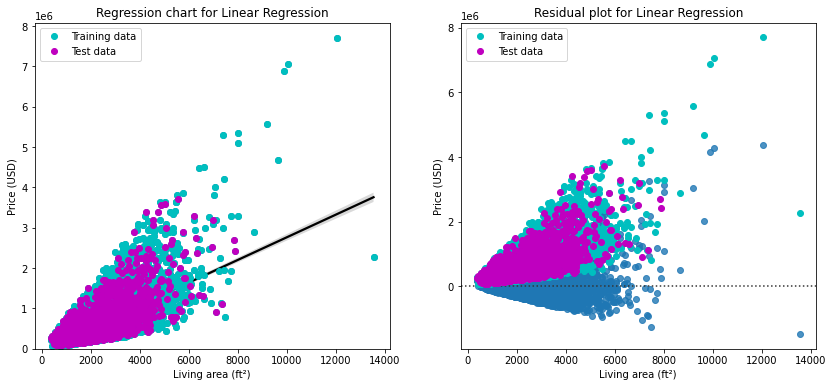

In [14]:
def evaluation_table():
  evaluation = pd.DataFrame({'Model': [],
                             'Further Details': [],
                             'R² (training)': [],
                             'R² (test)': [],
                             'RMSE': [],
                             'MAE': [],
                             'MAPE': [],
                             '10-Fold Cross Validation': []})
  
  return evaluation

def target_feature():
  target = 'price'
  feature = 'sqft_living'

  return target, feature

def data_split(data_analysis, feature, target):
  train, test = train_test_split(data_analysis, test_size = 0.2, random_state = 1)

  x_train = np.array(train[feature]).reshape(-1,1)
  y_train = train[target]

  x_test = np.array(test[feature]).reshape(-1,1)
  y_test = test[target]

  return train, test, x_train, x_test, y_train, y_test

def define_model():
  linear_regression = LinearRegression()

  return linear_regression

def fit_model(x_train, y_train):
  estimator_lr = linear_regression.fit(x_train, y_train)

  return estimator_lr

def predict_values(x_train, x_test):
  predictions_lr_train = estimator_lr.predict(x_train)
  predictions_lr_test = estimator_lr.predict(x_test)

  return predictions_lr_train, predictions_lr_test

def calculate_scores(y_train, predictions_lr_train, y_test, predictions_lr_test, data_analysis):
  r2_train = r2_score(y_train, predictions_lr_train).round(4)
  r2_test = r2_score(y_test, predictions_lr_test).round(4)

  rmse_test = np.sqrt(mean_squared_error(y_test, predictions_lr_test)).round(2)

  mae_test = mean_absolute_error(y_test, predictions_lr_test).round(2)

  mape_test = np.multiply(np.mean(np.abs((y_test - predictions_lr_test)/y_test)), 100).round(2)

  cv = float(format(cross_val_score(linear_regression, data_analysis[['sqft_living']], data_analysis['price'], cv = 10).mean(), '.4f'))

  return r2_train, r2_test, rmse_test, mae_test, mape_test, cv

def define_table(r2_train, r2_test, rmse_test, mae_test, mape_test, cv):
  r = evaluation.shape[0]
  evaluation.loc[r] = ['Simple Linear Regression', '-', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]

  return r, evaluation

def model_visualization(data_analysis):
  plt.figure(figsize=(14,6))
  
  plt.subplot(121)
  sns.regplot(x='sqft_living', y='price', data=data_analysis, line_kws={"color": "black"})
  plt.plot(x_train, y_train, 'co', label="Training data")
  plt.plot(x_test, y_test, 'mo', label="Test data")
  plt.title("Regression chart for Linear Regression")
  plt.xlabel("Living area (ft²)")
  plt.ylabel("Price (USD)")
  plt.ylim(0,)
  plt.legend()

  plt.subplot(122)
  sns.residplot(data_analysis['sqft_living'],data_analysis['price'])
  plt.plot(x_train, y_train, 'co', label="Training data")
  plt.plot(x_test, y_test, 'mo', label="Test data")
  plt.title("Residual plot for Linear Regression")
  plt.xlabel("Living area (ft²)")
  plt.ylabel("Price (USD)")
  plt.legend()

  return None

if __name__ == '__main__':
  evaluation = evaluation_table()

  target, feature = target_feature()

  train, test, x_train, x_test, y_train, y_test = data_split(data_analysis, feature, target)

  linear_regression = define_model()

  estimator_lr = fit_model(x_train, y_train)

  predictions_lr_train, predictions_lr_test = predict_values(x_train, x_test)

  r2_train, r2_test, rmse_test, mae_test, mape_test, cv = calculate_scores(y_train, predictions_lr_train, y_test, predictions_lr_test, data_analysis)

  r, evaluation = define_table(r2_train, r2_test, rmse_test, mae_test, mape_test, cv)

  model_visualization(data_analysis)

We may observe from the regression line chart that price is positively correlated with living area. The points are close to the predicted line and the price is increasing as the living area increases. However, for living areas larger than 5000 ft², the points start to spread too much around the generated line. Furthermore, from the residual plot, we observe that residuals are not randomly spead out around the x-axis. Thus, these phenomenons may suggest that Linear Regression is not the best fit for the data points.

In [15]:
evaluation

,Model,Further Details,R² (training),R² (test),RMSE,MAE,MAPE,10-Fold Cross Validation
0,Simple Linear Regression,-,0.49,0.48,254162.56,173423.76,36.33%,0.49


As well as the charts suggested, the measures indicate that Linear Regression is not a good fit. 

## 5.2. Multiple Linear Regression 1

Model without pre-processed features: Multiple Regression 1. As we cannot visualize a model for Multiple Linear Regression with regression chart and residual plot, we compared the distribution of the fitted values with the actual values. Furthermore, we also used statistical measures to analyze the goodness of fit.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

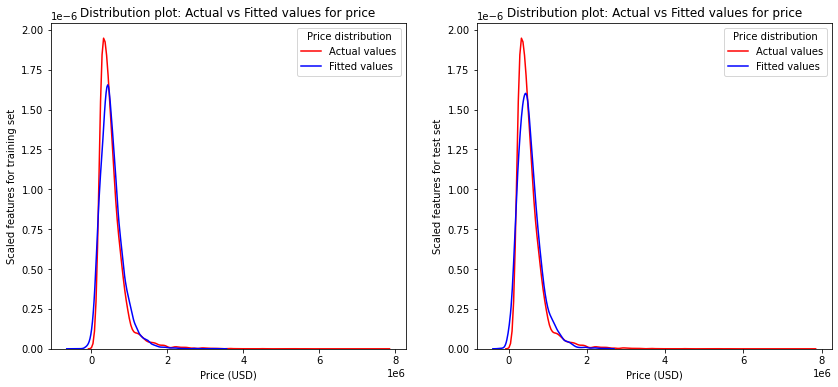

In [16]:
def target_features():
  target = 'price'
  features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
             'zipcode','lat','long']

  return target, features

def data_split(data_analysis, feature, target):
  train, test = train_test_split(data_analysis, test_size = 0.2, random_state = 1)

  x_train = train[features]
  y_train = train[target]

  x_test = test[features]
  y_test = test[target]

  return train, test, x_train, x_test, y_train, y_test

def data_normalize(x_train, x_test):
  scale = MinMaxScaler().fit(x_train)
  x_train_scaled = scale.transform(x_train)
  x_test_scaled = scale.transform(x_test)

  return scale, x_train_scaled, x_test_scaled

def define_model():
  linear_regression = LinearRegression()

  return linear_regression

def fit_model(x_train_scaled, y_train):
  estimator_lr = linear_regression.fit(x_train_scaled, y_train)

  return estimator_lr

def predict_values(x_train_scaled, x_test_scaled):
  predictions_lr_train = estimator_lr.predict(x_train_scaled)
  predictions_lr_test = estimator_lr.predict(x_test_scaled)

  return predictions_lr_train, predictions_lr_test

def calculate_scores(y_train, predictions_lr_train, y_test, predictions_lr_test, data_analysis):
  r2_train = r2_score(y_train, predictions_lr_train).round(4)
  r2_test = r2_score(y_test, predictions_lr_test).round(4)

  rmse_test = np.sqrt(mean_squared_error(y_test, predictions_lr_test)).round(2)

  mae_test = mean_absolute_error(y_test, predictions_lr_test).round(2)

  mape_test = np.multiply(np.mean(np.abs((y_test - predictions_lr_test)/y_test)), 100).round(2)

  cv = float(format(cross_val_score(linear_regression, data_analysis[features], data_analysis['price'], cv = 10).mean(), '.4f'))

  return r2_train, r2_test, rmse_test, mae_test, mape_test, cv

def define_table(r2_train, r2_test, rmse_test, mae_test, mape_test, cv):
  r = evaluation.shape[0]
  evaluation.loc[r] = ['Multiple Linear Regression 1', 'without pre-processed features', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]

  return r, evaluation

def model_visualization(data_analysis):
  plt.figure(figsize=(14,6))

  plt.subplot(121)
  ax1 = sns.distplot(data_analysis['price'], hist=False, color='r', label="Actual values")
  sns.distplot(predictions_lr_train, hist=False, color='b', label="Fitted values", ax=ax1)
  plt.title("Distribution plot: Actual vs Fitted values for price")
  plt.xlabel("Price (USD)")
  plt.ylabel("Scaled features for training set")
  plt.legend(title="Price distribution", loc="upper right", labels=["Actual values","Fitted values"])
  

  plt.subplot(122)
  ax2 = sns.distplot(data_analysis['price'], hist=False, color='r', label="Actual values")
  sns.distplot(predictions_lr_test, hist=False, color='b', label="Fitted values", ax=ax2)
  plt.title("Distribution plot: Actual vs Fitted values for price")
  plt.xlabel("Price (USD)")
  plt.ylabel("Scaled features for test set")
  plt.legend(title="Price distribution", loc="upper right", labels=["Actual values","Fitted values"])

  plt.show()
  plt.close()

  return None

if __name__ == '__main__':
  target, features = target_features()

  train, test, x_train, x_test, y_train, y_test = data_split(data_analysis, feature, target)

  scale, x_train_scaled, x_test_scaled = data_normalize(x_train, x_test)
  
  linear_regression = define_model()

  estimator_lr = fit_model(x_train_scaled, y_train)

  predictions_lr_train, predictions_lr_test = predict_values(x_train_scaled, x_test_scaled)

  r2_train, r2_test, rmse_test, mae_test, mape_test, cv = calculate_scores(y_train, predictions_lr_train, y_test, predictions_lr_test, data_analysis)

  r, evaluation = define_table(r2_train, r2_test, rmse_test, mae_test, mape_test, cv)

  model_visualization(data_analysis)

We can observe that the fitted values are reasonably close the actual values, in both sets, since tey overlap a bit. However, maybe it is possible to better predict price close to the mean value, where there is a lack of model accuracy.

In [17]:
evaluation

,Model,Further Details,R² (training),R² (test),RMSE,MAE,MAPE,10-Fold Cross Validation
0,Simple Linear Regression,-,0.49,0.48,254162.56,173423.76,36.33%,0.49
1,Multiple Linear Regression 1,without pre-processed features,0.70,0.71,191289.33,124861.89,25.64%,0.70


Multiple Linear Regression 1 is a way better than Simple Linear Regression. Yet, it is far from being a very good fit, accordingly to its statistical measures. In order to improve Multiple Linear Regression, we used more variables in the next section.

## 5.3. Multiple Linear Regression 2

Model with pre-processed features: Multiple Regression 2.  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

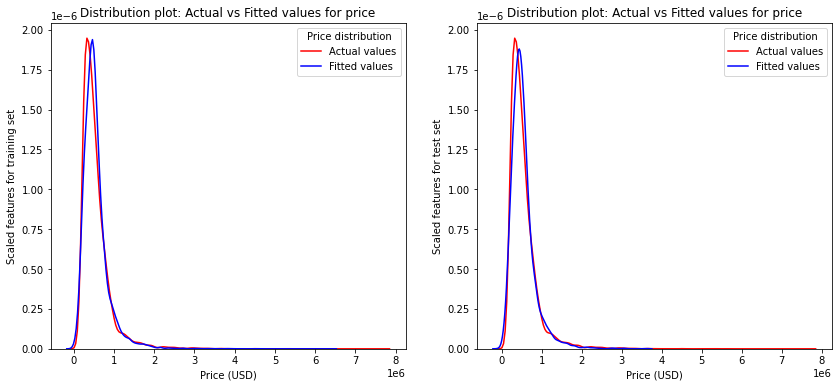

In [18]:
def target_features():
  target = 'price'
  features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
             'zipcode','lat','long','in_city','basement','renovation','construction',
              'dayofweek','month','year','living_and_bathrooms','living_and_grade',
              'bathrooms_and_grade_and_living','season_Fall','season_Spring',
              'season_Summer','season_Winter']

  return target, features

def data_split(data_analysis, feature, target):
  train, test = train_test_split(data_analysis, test_size = 0.2, random_state = 1)

  x_train = train[features]
  y_train = train[target]

  x_test = test[features]
  y_test = test[target]

  return train, test, x_train, x_test, y_train, y_test

def data_normalize(x_train, x_test):
  scale = MinMaxScaler().fit(x_train)
  x_train_scaled = scale.transform(x_train)
  x_test_scaled = scale.transform(x_test)

  return scale, x_train_scaled, x_test_scaled

def define_model():
  linear_regression = LinearRegression()

  return linear_regression

def fit_model(x_train_scaled, y_train):
  estimator_lr_chosen = linear_regression.fit(x_train_scaled, y_train)

  return estimator_lr_chosen

def predict_values(x_train_scaled, x_test_scaled):
  predictions_lr_train = estimator_lr_chosen.predict(x_train_scaled)
  predictions_lr_test = estimator_lr_chosen.predict(x_test_scaled)

  return predictions_lr_train, predictions_lr_test

def calculate_scores(y_train, predictions_lr_train, y_test, predictions_lr_test, data_analysis):
  r2_train = r2_score(y_train, predictions_lr_train).round(4)
  r2_test = r2_score(y_test, predictions_lr_test).round(4)

  rmse_test = np.sqrt(mean_squared_error(y_test, predictions_lr_test)).round(2)

  mae_test = mean_absolute_error(y_test, predictions_lr_test).round(2)

  mape_test = np.multiply(np.mean(np.abs((y_test - predictions_lr_test)/y_test)), 100).round(2)

  cv = float(format(cross_val_score(linear_regression, data_analysis[features], data_analysis['price'], cv = 10).mean(), '.4f'))

  return r2_train, r2_test, rmse_test, mae_test, mape_test, cv

def define_table(r2_train, r2_test, rmse_test, mae_test, mape_test, cv):
  r = evaluation.shape[0]
  evaluation.loc[r] = ['Multiple Linear Regression 2', 'with pre-processed features', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]

  return r, evaluation

def model_visualization(data_analysis):
  plt.figure(figsize=(14,6))

  plt.subplot(121)
  ax1 = sns.distplot(data_analysis['price'], hist=False, color='r', label="Actual values")
  sns.distplot(predictions_lr_train, hist=False, color='b', label="Fitted values", ax=ax1)
  plt.title("Distribution plot: Actual vs Fitted values for price")
  plt.xlabel("Price (USD)")
  plt.ylabel("Scaled features for training set")
  plt.legend(title="Price distribution", loc="upper right", labels=["Actual values","Fitted values"])
  

  plt.subplot(122)
  ax2 = sns.distplot(data_analysis['price'], hist=False, color='r', label="Actual values")
  sns.distplot(predictions_lr_test, hist=False, color='b', label="Fitted values", ax=ax2)
  plt.title("Distribution plot: Actual vs Fitted values for price")
  plt.xlabel("Price (USD)")
  plt.ylabel("Scaled features for test set")
  plt.legend(title="Price distribution", loc="upper right", labels=["Actual values","Fitted values"])

  plt.show()
  plt.close()

  return None

if __name__ == '__main__':
  target, features = target_features()

  train, test, x_train, x_test, y_train, y_test = data_split(data_analysis, feature, target)

  scale, x_train_scaled, x_test_scaled = data_normalize(x_train, x_test)
  
  linear_regression = define_model()

  estimator_lr_chosen = fit_model(x_train_scaled, y_train)

  predictions_lr_train, predictions_lr_test = predict_values(x_train_scaled, x_test_scaled)

  r2_train, r2_test, rmse_test, mae_test, mape_test, cv = calculate_scores(y_train, predictions_lr_train, y_test, predictions_lr_test, data_analysis)

  r, evaluation = define_table(r2_train, r2_test, rmse_test, mae_test, mape_test, cv)

  model_visualization(data_analysis)

This model is clearly better than the last one. The lack of accuracy close to mean value was minimized.

In [19]:
evaluation

,Model,Further Details,R² (training),R² (test),RMSE,MAE,MAPE,10-Fold Cross Validation
0,Simple Linear Regression,-,0.49,0.48,254162.56,173423.76,36.33%,0.49
1,Multiple Linear Regression 1,without pre-processed features,0.70,0.71,191289.33,124861.89,25.64%,0.70
2,Multiple Linear Regression 2,with pre-processed features,0.75,0.74,181388.32,113559.92,22.71%,0.74


Multiple Linear Regression 2 is a much better fit than the others, based on statistical measures. 

## 5.4. Polynomial Regression

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models. We get non-linear relationships by squaring or setting higher-order terms of the independent/predictor variables. As independent variable, we chose 'sqft_living', since it was the most correlated with price in the heatmap (section 2.1). It was performed a degree two polynomial transformation on the data. 

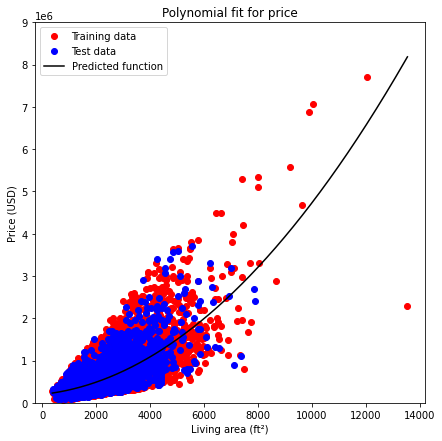

In [20]:
def target_features(data_analysis):
  y_data = data_analysis['price']
  x_data = data_analysis.drop(['id','date','price'], axis=1)

  return y_data, x_data

def data_split(x_data, y_data):
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

  return x_train, x_test, y_train, y_test

def define_model():
  lr = LinearRegression()

  return lr

def data_transform():
  pr = PolynomialFeatures(degree=2)
  x_train_pr = pr.fit_transform(x_train[['sqft_living']])
  x_test_pr = pr.fit_transform(x_test[['sqft_living']])

  return pr, x_train_pr, x_test_pr

def fit_model(lr, x_train_pr, y_train):
  estimator_lr = lr.fit(x_train_pr, y_train)

  return estimator_lr

def predict_values(x_train_pr, x_test_pr):
  predictions_lr_train = estimator_lr.predict(x_train_pr)
  predictions_lr_test = estimator_lr.predict(x_test_pr)

  return predictions_lr_train, predictions_lr_test

def calculate_score():
  r2_train = lr.score(x_train_pr, y_train).round(2)
  r2_test = lr.score(x_test_pr, y_test).round(2)

  rmse_test = np.sqrt(mean_squared_error(y_test, predictions_lr_test)).round(2)

  mae_test = mean_absolute_error(y_test, predictions_lr_test).round(2)

  mape_test = np.multiply(np.mean(np.abs((y_test - predictions_lr_test)/y_test)), 100).round(2)

  cv = float(format(cross_val_score(lr, data_analysis[['sqft_living']], data_analysis['price'], cv = 10).mean(), '.4f'))

  return r2_train, r2_test, rmse_test, mae_test, mape_test, cv

def define_table(r2_train, r2_test, rmse_test, mae_test, mape_test, cv):
  r = evaluation.shape[0]
  evaluation.loc[r] = ['Polynomial Regression', '-', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]

  return r, evaluation

def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
  plt.figure(figsize=(7,7))

  xmax = max([xtrain.values.max(), xtest.values.max()])
  xmin = min([xtrain.values.min(), xtest.values.min()])

  x = np.arange(xmin, xmax, 0.1)

  plt.plot(xtrain, y_train, 'ro', label="Training data")
  plt.plot(xtest, y_test, 'bo', label="Test data")
  plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), 'k-', label="Predicted function")
  plt.ylim([0,9000000])
  plt.title('Polynomial fit for price')
  plt.ylabel('Price (USD)')
  plt.xlabel('Living area (ft²)')
  plt.legend()

  return None

if __name__ == '__main__':
  y_data, x_data = target_features(data_analysis)

  x_train, x_test, y_train, y_test = data_split(x_data, y_data)

  lr = define_model()

  pr, x_train_pr, x_test_pr = data_transform()

  estimator_lr = fit_model(lr, x_train_pr, y_train)

  predictions_lr_train, predictions_lr_test = predict_values(x_train_pr, x_test_pr)

  r, evaluation = define_table(r2_train, r2_test, rmse_test, mae_test, mape_test, cv)

  PollyPlot(x_train[['sqft_living']], x_test[['sqft_living']], y_train, y_test, lr, pr)

The polynomial model presented a relatively good fit. It is quite evident that Polynomial Regression described much better the price than the Linear Regression.  

In [21]:
evaluation

,Model,Further Details,R² (training),R² (test),RMSE,MAE,MAPE,10-Fold Cross Validation
0,Simple Linear Regression,-,0.49,0.48,254162.56,173423.76,36.33%,0.49
1,Multiple Linear Regression 1,without pre-processed features,0.70,0.71,191289.33,124861.89,25.64%,0.70
2,Multiple Linear Regression 2,with pre-processed features,0.75,0.74,181388.32,113559.92,22.71%,0.74
3,Polynomial Regression,-,0.75,0.74,181388.32,113559.92,22.71%,0.74


We may observe that the Polynomial Regression results in statistical measures very similar to the Multiple Linear Regression 2. The advantage is that this goodness of fit was achieved with only one independent variable, while Multiple Linear Regressions included a set of independent variables. For a phenomenon description, it is better to use simpler and efficient models, since we must avoid over and underfitting. 

## 5.5. Ridge Regression

### 5.5.1. Ridge Regression model

Ridge regression is a method of estimating the coefficients of multiple-regression models. It is used when the number of independent variables in a set exceeds the number of observations, or when a data set has multicollinearity (independent variables are highly correlated). We may conclude about Ridge Regression:
- Objective = RSS + alpha*(SSC). It means alpha is the parameter which balances the amount of emphasis giving to minimizing RSS (Residual Sum of Square) vs mimizing SSC (sum of square coefficients).
- If alpha is 0, so the objective function becomes same as simple linear regression.
- The bias increases as alpha increases. 
- The variance decreases as alpha increases. 

Thus, as alpha increases, the model complexity reduces. The result is that higher alpha values reduces overfitting. However, Significantly high values can cause underfitting as well. Therefore, alpha must be chosen wisely. A way to determine alpha values is by trial and error. Then, we may use cross-validation to evaluate the fit and the alpha value giving the highest cross-validation score is chosen. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

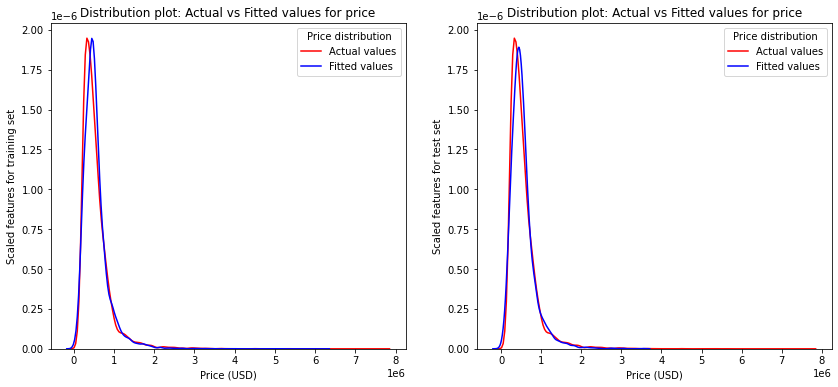

In [22]:
def target_features():
  target = 'price'
  features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
             'zipcode','lat','long','in_city','basement','renovation','construction',
              'dayofweek','month','year','living_and_bathrooms','living_and_grade',
              'bathrooms_and_grade_and_living','season_Fall','season_Spring',
              'season_Summer','season_Winter']

  return target, features

def data_split(data_analysis, feature, target):
  train, test = train_test_split(data_analysis, test_size = 0.2, random_state = 1)

  x_train = train[features]
  y_train = train[target]

  x_test = test[features]
  y_test = test[target]

  return train, test, x_train, x_test, y_train, y_test

def data_normalize(x_train, x_test):
  scale = MinMaxScaler().fit(x_train)
  x_train_scaled = scale.transform(x_train)
  x_test_scaled = scale.transform(x_test)

  return scale, x_train_scaled, x_test_scaled

def ridge_reg():
  alphas = [0.01, 1, 2, 5, 10, 100, 1000]
  i = 1

  for alpha in alphas:
    ridge_regression = Ridge(alpha=alpha)

    estimator_ridge = ridge_regression.fit(x_train_scaled, y_train)

    predictions_ridge_train = estimator_ridge.predict(x_train_scaled)
    predictions_ridge_test = estimator_ridge.predict(x_test_scaled)

    r2_train = r2_score(y_train, predictions_ridge_train).round(4)
    r2_test = r2_score(y_test, predictions_ridge_test).round(4)
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_ridge_test)).round(2)
    mae_test = mean_absolute_error(y_test, predictions_ridge_test).round(2)
    mape_test = np.multiply(np.mean(np.abs((y_test - predictions_ridge_test)/y_test)), 100).round(2)
    cv = float(format(cross_val_score(ridge_regression, data_analysis[features], data_analysis['price'], cv = 10).mean(), '.4f'))

    r = evaluation.shape[0]
    evaluation.loc[r] = [f'Ridge Regression {i}', f'Apha = {alpha}', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]

    i = i + 1

  return evaluation

def best_alpha():
  ridge_regression = Ridge(alpha=0.01)

  estimator_ridge = ridge_regression.fit(x_train_scaled, y_train)

  predictions_ridge_train = estimator_ridge.predict(x_train_scaled)
  predictions_ridge_test = estimator_ridge.predict(x_test_scaled)

  return predictions_ridge_train, predictions_ridge_test

def model_visualization(data_analysis):
  plt.figure(figsize=(14,6))

  plt.subplot(121)
  ax1 = sns.distplot(data_analysis['price'], hist=False, color='r', label="Actual values")
  sns.distplot(predictions_ridge_train, hist=False, color='b', label="Fitted values", ax=ax1)
  plt.title("Distribution plot: Actual vs Fitted values for price")
  plt.xlabel("Price (USD)")
  plt.ylabel("Scaled features for training set")
  plt.legend(title="Price distribution", loc="upper right", labels=["Actual values","Fitted values"])
  

  plt.subplot(122)
  ax2 = sns.distplot(data_analysis['price'], hist=False, color='r', label="Actual values")
  sns.distplot(predictions_ridge_test, hist=False, color='b', label="Fitted values", ax=ax2)
  plt.title("Distribution plot: Actual vs Fitted values for price")
  plt.xlabel("Price (USD)")
  plt.ylabel("Scaled features for test set")
  plt.legend(title="Price distribution", loc="upper right", labels=["Actual values","Fitted values"])

  plt.show()
  plt.close()

  return None

if __name__ == '__main__':
  target, features = target_features()

  train, test, x_train, x_test, y_train, y_test = data_split(data_analysis, feature, target)

  scale, x_train_scaled, x_test_scaled = data_normalize(x_train, x_test)
  
  evaluation = ridge_reg()

  predictions_ridge_train, predictions_ridge_test = best_alpha()

  model_visualization(data_analysis)  

The charts above are from the alpha value (alpha = 0.01) which resulted in best fit. This decision was take using the statistical measures from the table below. 

In [23]:
evaluation

,Model,Further Details,R² (training),R² (test),RMSE,MAE,MAPE,10-Fold Cross Validation
0,Simple Linear Regression,-,0.49,0.48,254162.56,173423.76,36.33%,0.49
1,Multiple Linear Regression 1,without pre-processed features,0.70,0.71,191289.33,124861.89,25.64%,0.70
2,Multiple Linear Regression 2,with pre-processed features,0.75,0.74,181388.32,113559.92,22.71%,0.74
3,Polynomial Regression,-,0.75,0.74,181388.32,113559.92,22.71%,0.74
4,Ridge Regression 1,Apha = 0.01,0.75,0.74,181019.90,113531.52,22.71%,0.74
5,Ridge Regression 2,Apha = 1,0.75,0.74,180704.33,114138.61,22.99%,0.74
6,Ridge Regression 3,Apha = 2,0.74,0.74,181045.29,114612.80,23.14%,0.74
7,Ridge Regression 4,Apha = 5,0.74,0.74,182023.01,115645.13,23.44%,0.74
8,Ridge Regression 5,Apha = 10,0.73,0.73,183258.18,116443.86,23.65%,0.74
9,Ridge Regression 6,Apha = 100,0.69,0.70,192477.73,116226.01,23.23%,0.74


Ridge Regression 1 seems to be quite good as Multiple Linear Regression 2 and Polynomial Regression. Alpha values higher than 10 tend to present underfitting, based on the measures.

### 5.5.2. Alternative method to determine best values for Alpha

Another method to find a value of alpha that minimizes the test error is by a for loop. Below, a for loop with progress bar to see how many iterations we have completed so far. 

In [24]:
r2_train = []
r2_test = []
dummy1 = []
Alpha = 10 * np.array(range(0, 1000))
pbar = tqdm(Alpha)

for alpha in pbar:
  RidgeModel = Ridge(alpha=alpha)
  RidgeModel.fit(x_train_scaled, y_train)

  train_score, test_score = RidgeModel.score(x_train_scaled, y_train), RidgeModel.score(x_test_scaled, y_test)

  pbar.set_postfix({"Train Score": train_score, "Test Score": test_score})

  r2_train.append(train_score)
  r2_test.append(test_score)

100%|██████████| 1000/1000 [00:14<00:00, 70.60it/s, Train Score=0.119, Test Score=0.126]


Now, we plot out R² for different alphas:

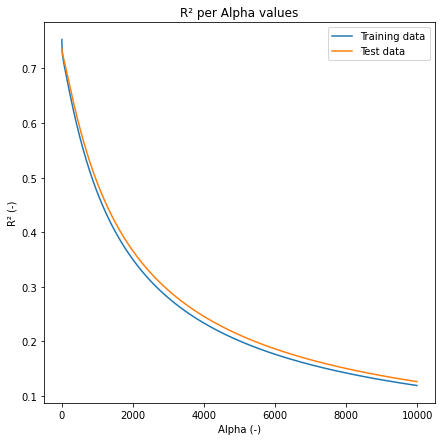

In [25]:
plt.figure(figsize=(7,7))

plt.plot(Alpha, r2_train, label="Training data")
plt.plot(Alpha, r2_test, label="Test data")
plt.title("R² per Alpha values")
plt.xlabel("Alpha (-)")
plt.ylabel("R² (-)")
plt.legend()

As have we already seen on table in the section 5.5.1, when Alpha values increase, Ridge Regression model suffers underfitting and loses its accuracy. The best Alpha values are around 0, for this case. Additionally, we may notice that training curve is countinuously below test curve, after a very small value of alpha. That graphically represents the underfitting.  

## 5.6. Random Forest Regression

### 5.7.1. Random forest regression with default hyperparameters

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. It operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees. As an advantage, it provides higher accuracy through cross validation.

[('living_and_grade', 0.571444936813225), ('lat', 0.167933611736142), ('long', 0.08041724869025033), ('sqft_lot', 0.021610848730088686), ('waterfront', 0.020875912862956807), ('sqft_living', 0.01830883223526909), ('bathrooms_and_grade_and_living', 0.01751357296245675), ('sqft_above', 0.015847447534076745), ('view', 0.012955109357615489), ('yr_built', 0.01246381506735969), ('zipcode', 0.011317723207917059), ('living_and_bathrooms', 0.008734254710304213), ('grade', 0.008055779240399926), ('sqft_basement', 0.00489606255334365), ('month', 0.004580068416446394), ('dayofweek', 0.003726679684688027), ('construction', 0.003132521549474289), ('condition', 0.0029223825102042958), ('bedrooms', 0.0026060144710121635), ('bathrooms', 0.002557770169058767), ('floors', 0.0019124226777867826), ('yr_renovated', 0.0011165255426941155), ('season_Spring', 0.0009832713563831827), ('year', 0.0008948223054434714), ('season_Summer', 0.0007440773829209226), ('renovation', 0.0006120132312686363), ('season_Winter

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

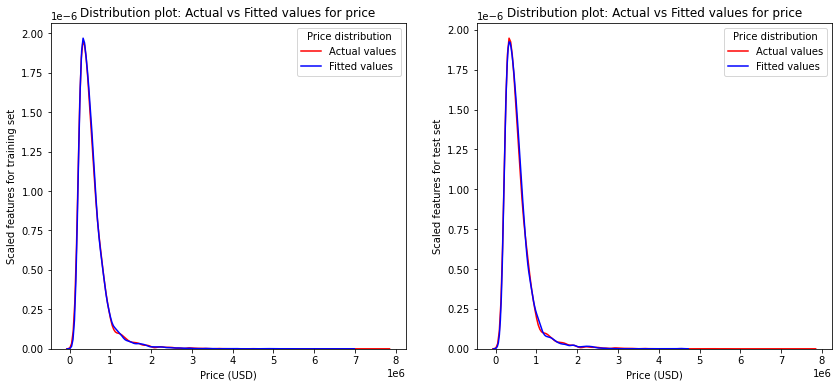

In [26]:
def target_features():
  target = 'price'
  features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
             'zipcode','lat','long','in_city','basement','renovation','construction',
              'dayofweek','month','year','living_and_bathrooms','living_and_grade',
              'bathrooms_and_grade_and_living','season_Fall','season_Spring',
              'season_Summer','season_Winter']

  return target, features

def data_split(data_analysis, feature, target):
  train, test = train_test_split(data_analysis, test_size = 0.2, random_state = 1)

  x_train = train[features]
  y_train = train[target]

  x_test = test[features]
  y_test = test[target]

  return train, test, x_train, x_test, y_train, y_test

def data_normalize(x_train, x_test):
  scale = MinMaxScaler().fit(x_train)
  x_train_scaled = scale.transform(x_train)
  x_test_scaled = scale.transform(x_test)

  return scale, x_train_scaled, x_test_scaled

def define_model():
  forest_regression = RandomForestRegressor(random_state=1)

  return forest_regression

def fit_model(x_train_scaled, y_train):
  estimator_rf = forest_regression.fit(x_train_scaled, y_train)

  return estimator_rf

def predict_values(x_train_scaled, x_test_scaled):
  predictions_rf_train = estimator_rf.predict(x_train_scaled)
  predictions_rf_test = estimator_rf.predict(x_test_scaled)

  return predictions_rf_train, predictions_rf_test

def calculate_scores(y_train, predictions_rf_train, y_test, predictions_rf_test, data_analysis):
  r2_train = r2_score(y_train, predictions_rf_train).round(4)
  r2_test = r2_score(y_test, predictions_rf_test).round(4)

  rmse_test = np.sqrt(mean_squared_error(y_test, predictions_rf_test)).round(2)

  mae_test = mean_absolute_error(y_test, predictions_rf_test).round(2)

  mape_test = np.multiply(np.mean(np.abs((y_test - predictions_rf_test)/y_test)), 100).round(2)

  cv = float(format(cross_val_score(forest_regression, data_analysis[features], data_analysis['price'], cv = 10).mean(), '.4f'))

  return r2_train, r2_test, rmse_test, mae_test, mape_test, cv

def define_table(r2_train, r2_test, rmse_test, mae_test, mape_test, cv):
  r = evaluation.shape[0]
  evaluation.loc[r] = ['Random Forest Regression', 'Default Hyperparameters', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]

  return r, evaluation

def show_importances(features, forest_regression):
  print(sorted(list(zip(features, forest_regression.feature_importances_)), key=lambda tup: tup[1], reverse=True),'\n\n')

  return None

def model_visualization(data_analysis):
  plt.figure(figsize=(14,6))

  plt.subplot(121)
  ax1 = sns.distplot(data_analysis['price'], hist=False, color='r', label="Actual values")
  sns.distplot(predictions_rf_train, hist=False, color='b', label="Fitted values", ax=ax1)
  plt.title("Distribution plot: Actual vs Fitted values for price")
  plt.xlabel("Price (USD)")
  plt.ylabel("Scaled features for training set")
  plt.legend(title="Price distribution", loc="upper right", labels=["Actual values","Fitted values"])
  

  plt.subplot(122)
  ax2 = sns.distplot(data_analysis['price'], hist=False, color='r', label="Actual values")
  sns.distplot(predictions_rf_test, hist=False, color='b', label="Fitted values", ax=ax2)
  plt.title("Distribution plot: Actual vs Fitted values for price")
  plt.xlabel("Price (USD)")
  plt.ylabel("Scaled features for test set")
  plt.legend(title="Price distribution", loc="upper right", labels=["Actual values","Fitted values"])

  plt.show()
  plt.close()

  return None  

if __name__ == '__main__':
  target, features = target_features()

  train, test, x_train, x_test, y_train, y_test = data_split(data_analysis, feature, target)

  scale, x_train_scaled, x_test_scaled = data_normalize(x_train, x_test)
  
  forest_regression = define_model()

  estimator_rf = fit_model(x_train, y_train)

  predictions_rf_train, predictions_rf_test = predict_values(x_train, x_test)

  r2_train, r2_test, rmse_test, mae_test, mape_test, cv = calculate_scores(y_train, predictions_rf_train, y_test, predictions_rf_test, data_analysis)

  r, evaluation = define_table(r2_train, r2_test, rmse_test, mae_test, mape_test, cv)

  show_importances(features, forest_regression)

  model_visualization(data_analysis)

From the chart above, we see an almost perfect fit for training data. However, if we check the chart for test data, we see a lack of accuracy for predict prices higher than 4 (1e6) dollars. This may be an overfitting. 

The **5 most important features** (based on the feature_importances_ function) for **random forest** are:
1. living_and_grade
2. lat
3. long
4. sqft_lot
5. waterfront

These 5 features can predict 86% of the price variance.

In [27]:
evaluation

,Model,Further Details,R² (training),R² (test),RMSE,MAE,MAPE,10-Fold Cross Validation
0,Simple Linear Regression,-,0.49,0.48,254162.56,173423.76,36.33%,0.49
1,Multiple Linear Regression 1,without pre-processed features,0.70,0.71,191289.33,124861.89,25.64%,0.70
2,Multiple Linear Regression 2,with pre-processed features,0.75,0.74,181388.32,113559.92,22.71%,0.74
3,Polynomial Regression,-,0.75,0.74,181388.32,113559.92,22.71%,0.74
4,Ridge Regression 1,Apha = 0.01,0.75,0.74,181019.90,113531.52,22.71%,0.74
5,Ridge Regression 2,Apha = 1,0.75,0.74,180704.33,114138.61,22.99%,0.74
6,Ridge Regression 3,Apha = 2,0.74,0.74,181045.29,114612.80,23.14%,0.74
7,Ridge Regression 4,Apha = 5,0.74,0.74,182023.01,115645.13,23.44%,0.74
8,Ridge Regression 5,Apha = 10,0.73,0.73,183258.18,116443.86,23.65%,0.74
9,Ridge Regression 6,Apha = 100,0.69,0.70,192477.73,116226.01,23.23%,0.74


As supposed, the random forest regression presented an overfitting, since the coefficient of determination of the training set (0.98) is very different and much higher than that of the test set (0.87). Trees generated by random forest method have maximum depth of each tree set to none (default), which means that each tree will expand until every leaf is pure. This will often result in over-fitted decision trees. Therefore, an alternative to minimize such problem is to choose a specific value for max_depth parameter. Another parameter we may specify is the number of trees (n_estimators), since its default value is 100 and higher numbers of trees gives us better perfomance - and slower coding. 

### 5.7.2. Random forest regression with hyperparameters tuned using GridSearchCV

Random forest regression with default hyperparameters resulted in overfitting (section 5.5.1). Thus, as an alternative solution, a hyperparameters tuning was made using GridSearchCV function. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameters simpler. 

As discussed in section 5.5.1, the hyperparameters we work with in this section is max_depth (maximum depth of each tree) and n_estimators (number of trees). It was chosen a 3-Fold Cross validation, since the default (cv=10) is very time-demanding and does not either result in better statistical measures. The procedure may be seen below: 

In [28]:
def set_grid():
  param_grid = {'max_depth': [2, 4, 6],
                'n_estimators': [100, 500, 1000]}

  return param_grid

def define_model():
  forest_regression = RandomForestRegressor(random_state=1)

  return forest_regression

def search_grid(forest_regression, param_grid):
  rf_grid = GridSearchCV(estimator=forest_regression, param_grid=param_grid, cv=3, verbose=4, return_train_score=True)

  return rf_grid

def fit_model(rf_grid):
  rf_grid.fit(x_train_scaled, y_train)

  return None 

if __name__ == '__main__':
  param_grid = set_grid()

  forest_regression = define_model()

  rf_grid = search_grid(forest_regression, param_grid)

  fit_model(rf_grid)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END max_depth=2, n_estimators=100;, score=(train=0.574, test=0.582) total time=   1.7s
[CV 2/3] END max_depth=2, n_estimators=100;, score=(train=0.575, test=0.540) total time=   1.7s
[CV 3/3] END max_depth=2, n_estimators=100;, score=(train=0.608, test=0.569) total time=   1.7s
[CV 1/3] END max_depth=2, n_estimators=500;, score=(train=0.574, test=0.585) total time=   8.4s
[CV 2/3] END max_depth=2, n_estimators=500;, score=(train=0.572, test=0.537) total time=   8.4s
[CV 3/3] END max_depth=2, n_estimators=500;, score=(train=0.607, test=0.568) total time=   8.4s
[CV 1/3] END max_depth=2, n_estimators=1000;, score=(train=0.575, test=0.586) total time=  16.7s
[CV 2/3] END max_depth=2, n_estimators=1000;, score=(train=0.570, test=0.535) total time=  16.7s
[CV 3/3] END max_depth=2, n_estimators=1000;, score=(train=0.607, test=0.569) total time=  16.7s
[CV 1/3] END max_depth=4, n_estimators=100;, score=(train=0.770, test=0.7

We may conclude according to tuned hyperparameters and their **R² (score)**:
- **max_depth = 2** resulted in **poor fitting**.
- **max_depth = 4** resulted in better fitting than those with max_depth = 2. Yet, it presented **clear overfitting**.
- **max_depth = 6** resulted in **very clear overfitting**.
- As we may observe, the goodness of fit was **not influenced** by the **number of trees** (n_estimators).

Since **we look for the simplest and most representative machine learning model**, the choice to preditc property prices - based on charts and on statistical measures - is **Multiple Linear Regression 2**. Additionally, this model has an explicit equation which may provide better explainability.

# 6. Insights

This sections aims to highlight the main insights from hypothesis test.

**Hypothesis 2:** Properties with basement are 20% more expensive, on median, than those without basement.

**True.** Properties with basement are, approximately, 25% more expensive than those without basement. Thus, we may construct a basement and enhance the price sale in 25%. 

**Hypothesis 3:** Properties which were renovated after 2000's are 45% more expensive, on median, than those without renovation and 20% more expensive, on median, than those renovated before 2000's.

**True.** Properties which were **NOT** renovated are 95.77% of the dataset and those which were renovated after 2000's are more expensive. However, properties renovated in 2010's are 19% and 15%, on median, cheaper than those renovated in 2000's and 90's, respectively. Furthermore, properties renovated in 2010 are 51.12% and 52.1% more expensive, on median, than those renovated in 60's and 50's, respectively. Therefore, **(1)** there are lots of available properties to be purchased and renovated; **(2)** we may incrase the price of the properties renovated in 2010's in order to match the value of those renovated in 90's and in 2000's; **(3)** we may renovate properties which were renovated in 60's and in 50's - since it is been a long time - and hence to increase more than 50% of their prices.

**Hypothesis 4:** Properties constructed after 2000's are 2% cheaper, on median.

**False.** Properties constructed after 2000's are more expensive. The 2000's is the decade with the highest construction percentage (16.28%). Properties constructed in 2010's are 42.09% more expensive, on median, than those constructed in 60's. This give us the possibility to purchase cheaper 60's properties, renovated them, and resell them with prices from 42 to 52% higher. 

**Hypothesis 5:** The property prices are related to the day of week, to the month, to the year and to the season.

**True.** (5.1) Day of week: Saturday and sunday are the days which properties are least purchased. Each one has 1.33% and 1.06% of total sales, respectively. Even so, they have have the highest median prices which are 475000.0 and $ 471250.0 dollars, respectively. Thus, we can make a sale on these days in order to sell more properties. Furthermore, as tuesday is the highest percentage sale day (21.81%), we may choose specific properties to sell on this day to increase profit. 

**True.** (5.2) Month: The month with the smallest number of properties sold is January (4.5%) and the highest is May (11.2%). The lowest median price is for February: 426045.0 dollars. The highest median price is for April: 477000.0 dollars. So we may purchase properties in February (due to the lowest prices) and resell them in April (highest prices) to increase profit.

**True.** (5.4) Season: The lowest median price is for winter: 435000.0 dollars. Winter is the season which properties were least sold (16.94%). The highest median price is for spring: 470000.0 dollars. Spring is also the season which properties were most sold (31.86%). This suggests to purchase properties in winter and resell them in spring. 

# 7. Business Results

House Rocket's CEO requested a strategy to purchase and resell properties. The questions he set and my proposed answers are below.

**Question (i).** What properties should we purchase and at what price?

**Proposed answer:** We should purchase **(1)** 3-bedrooms properties; **(2)** without basement; **(3)** which were constructed in 60's; **(4)** which were NOT renovated or which were renovated in 60's or 50's. We should choose properties with price up to $ 500,000.00.

The choice was made because **(1)** 3-bedrooms properties are the most available in the dataset; **(2)** we may increase their prices in 25% by construction a basement; **(3)** we may increase their prices around 42% if we choose those constructed in 60's; **(4)** we may increase their prices in around 52% if we choose properties renovated in 60's or 50's. Usually, median prices are up to 500,000.00 dollars. Hence, properties up to this value should be chosen.

**Question (ii).** After the properties are in the company's possession, what is the best time to sell them and what would the sale prices be?

**Proposed answer:** Firstly, we should purchase properties **(1)** in the winter; **(2)** in February; **(3)** and on Thursday. Then, we should resell them **(4)** in the spring; **(5)** in April; **(6)** and on Tuesday. The prices depend on the conditions discussed in the question (i). 

This choice was made because **(1)** winter has the lowest median price for season; **(2)** February has the lowest median price for month; **(3)** Thursday has the lowest median price for day of week; **(4)** Spring has the highest median price for season; **(5)** April has the highest median price for month and it is the second highest month in wich properties are sold; and **(6)** and Tuesday is the day on which most properties are sold.

**Question (iii).** Should House Rocket do a renovation to raise the sale price? What would be the suggestions for changes? What is the price increase given for each refurbishment option?

House Rocket should do a renovation to raise the sale price. The suggestions are to add bathrooms (one of the features most correlated with price) and a basement (chosen by hypothesis 2). The price increase to add a bathroom must be 25% and also 25% to construct a basement. These values were chosen based on the average price difference between renovated and not renovated properties, which is around 50% - see *House_Rocket* insight project.

## 7.1. Data Preparation

For data preparation, firstly we selected properties with characteristics mentioned in the previous section and condition equals or higher than 3. These properties were assigned to a dataframe named "data_business". Then, we updated (1) the number of bathrooms by adding 3 to the new dataframe; (2) 'renovation' status by changing 0 for 1; and (3) time situation, such as date, renovation year and season. Finally, we assigned the updated conditions to a new dataframe named "data_business_new". The new dataframe may be seen below.

- We selected properties with 5 bedrooms and number of bathrooms less than 3 in order to add a number of bathrooms to match the number of bedrooms.
- The cost per added bathrooms was 9000.00 dollars. 
- A condition equals to or higher than 3 was chosen because it is a good property condition (to avoid structural problems) and also the condition of the majority of properties. 
- Properties with living area larger than 1900 ft² were selected to be able to enlarge them.
- The limit price settled was of 260000.00 dollars to purchase each property.
- The month to resell the properties was April. 
- A minimum profit margin of 10% was settled to validate the business. We may see the minimum profit margin and also a maximum loss margin (10%) in the chart below in section 7.2.
- No basement was constructed since it was not profitable.
- Saturday was not chosen because it was not the most profitable day, as supposed based on the insights.  

In [29]:
def data_copy(data_analysis):
  data_business = data_analysis.copy()

  return data_business

def data_selection(data_business):
  data_business = data_business[data_business['bedrooms'] == 5]
  data_business = data_business[data_business['bathrooms'] < 3]
  data_business = data_business[data_business['sqft_basement'] == 0]
  data_business = data_business[(data_business['yr_built'] >= 1950) & (data_business['yr_built'] < 1970)]
  data_business = data_business[data_business['sqft_living'] >= 1900]
  data_business = data_business[(data_business['yr_renovated'] == 0)]
  data_business = data_business[data_business['price'] <= 260000]
  data_business = data_business[data_business['condition'] >= 3]

  data_business = data_business.reset_index(drop=True)

  return data_business

def data_preparation(data_business):
  data_business_new = data_business.copy()
  data_business_new = data_business_new.drop(['season_Fall','season_Spring','season_Summer','season_Winter'], axis=1)

  data_business_new['renovation'] = 1
  #data_business_new['basement'] = 1

  data_business_new['month'] = data_business_new['date'].dt.month

  for i in range(len(data_business_new)):
   data_business_new.loc[i, 'bathrooms'] = data_business_new.loc[i, 'bathrooms'] + 3
   #data_business_new.loc[i, 'sqft_basement'] = 250
   #data_business_new.loc[i, 'sqft_living'] = data_business_new.loc[i, 'sqft_living'] + 250
    
   if (data_business_new.loc[i, 'month'] == 1):
    data_business_new.loc[i, 'date'] = data_business_new.loc[i, 'date'] + relativedelta(months=+3)

   elif (data_business_new.loc[i, 'month'] == 2):
    data_business_new.loc[i, 'date'] = data_business_new.loc[i, 'date'] + relativedelta(months=+2)

   elif (data_business_new.loc[i, 'month'] == 3):
    data_business_new.loc[i, 'date'] = data_business_new.loc[i, 'date'] + relativedelta(months=+1)

   elif (data_business_new.loc[i, 'month'] == 6):
    data_business_new.loc[i, 'date'] = data_business_new.loc[i, 'date'] + relativedelta(months=+10)

   elif (data_business_new.loc[i, 'month'] == 7):
    data_business_new.loc[i, 'date'] = data_business_new.loc[i, 'date'] + relativedelta(months=+9)

   elif (data_business_new.loc[i, 'month'] == 8):
    data_business_new.loc[i, 'date'] = data_business_new.loc[i, 'date'] + relativedelta(months=+8)

   elif (data_business_new.loc[i, 'month'] == 9):
    data_business_new.loc[i, 'date'] = data_business_new.loc[i, 'date'] + relativedelta(months=+7)

   elif (data_business_new.loc[i, 'month'] == 10):
    data_business_new.loc[i, 'date'] = data_business_new.loc[i, 'date'] + relativedelta(months=+6)

   elif (data_business_new.loc[i, 'month'] == 11):
    data_business_new.loc[i, 'date'] = data_business_new.loc[i, 'date'] + relativedelta(months=+5)

   elif (data_business_new.loc[i, 'month'] == 12):
    data_business_new.loc[i, 'date'] = data_business_new.loc[i, 'date'] + relativedelta(months=+4) 

  data_analy = data_business_new.copy()
  data_analy['date'] = pd.to_datetime(data_analy['date']).dt.strftime('%m-%d')
  for i in range(len(data_analy)):
      if (data_analy.loc[i,'date'] >= '03-20') & (data_analy.loc[i,'date'] < '06-21'):
          data_analy.loc[i,'season'] = 'Spring'

      elif (data_analy.loc[i,'date'] >= '06-21') & (data_analy.loc[i,'date'] < '09-23'):
          data_analy.loc[i,'season'] = 'Summer'

      elif (data_analy.loc[i,'date'] >= '09-23') & (data_analy.loc[i,'date'] < '12-22'):
          data_analy.loc[i,'season'] = 'Fall'
        
      else:
          data_analy.loc[i,'season'] = 'Winter'

  data_business_new['season'] = data_analy['season']
  
  data_business_new['dayofweek'] = data_business_new['date'].dt.dayofweek
  data_business_new['month'] = data_business_new['date'].dt.month
  data_business_new['year'] = data_business['date'].dt.year

  data_business_new['yr_renovated'] = data_business_new['date'].dt.year

  return data_business_new

def season_dummmies(data_business_new):
  data_business_new = pd.get_dummies(data_business_new)

  return data_business_new

def add_season(data_business_new):
  for i in range(len(data_business_new)):
    data_business_new.loc[i, 'season_Fall'] = 0
    data_business_new.loc[i, 'season_Summer'] = 0
    data_business_new.loc[i, 'season_Winter'] = 0

  data_business_new['season_Fall'].astype(int).round(0)
  data_business_new['season_Summer'].astype(int).round(0)
  data_business_new['season_Winter'].astype(int).round(0)

  return data_business_new

if __name__ == '__main__':
  data_business = data_copy(data_analysis)

  data_business = data_selection(data_business)

  data_business_new = data_preparation(data_business)

  data_business_new = season_dummmies(data_business_new)

  data_business_new = add_season(data_business_new)

In [30]:
data_business_new

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,in_city,basement,renovation,construction,dayofweek,month,year,living_and_bathrooms,living_and_grade,bathrooms_and_grade_and_living,season_Spring,season_Fall,season_Summer,season_Winter
0,8731901940,2015-04-04,218000.00,5,4.75,1930,8040,1.00,0,0,4,8,1930,0,1966,2015,98023,47.31,-122.38,2370,8000,0,0,1,6,5,4,2015,33.77,15.44,61.76,1,0.00,0.00,0.00
1,522049104,2015-04-29,210000.00,5,4.75,2340,9148,2.00,0,0,3,7,2340,0,1957,2015,98198,47.42,-122.32,1390,10019,0,0,1,5,2,4,2014,40.95,16.38,70.78,1,0.00,0.00,0.00
2,3339900096,2015-04-10,250750.00,5,4.75,2140,12058,1.00,0,0,4,8,2140,0,1951,2015,98002,47.32,-122.21,1640,10125,0,0,1,5,4,4,2014,37.45,17.12,68.48,1,0.00,0.00,0.00
3,3800008,2015-04-24,178000.00,5,4.50,1990,18200,1.00,0,0,3,7,1990,0,1960,2015,98178,47.49,-122.26,1860,8658,1,0,1,6,4,4,2015,29.85,13.93,56.72,1,0.00,0.00,0.00
4,5153200486,2015-04-15,185000.00,5,4.75,1990,27810,1.00,0,0,3,7,1990,0,1955,2015,98023,47.33,-122.35,2240,20000,0,0,1,5,2,4,2014,34.83,13.93,60.20,1,0.00,0.00,0.00
5,1432900350,2015-04-17,215000.00,5,4.50,1980,7958,1.50,0,0,3,7,1980,0,1962,2015,98058,47.46,-122.17,1510,8438,0,0,1,6,4,4,2014,29.70,13.86,56.43,1,0.00,0.00,0.00
6,1921059213,2015-04-27,246000.00,5,4.75,2030,10200,1.00,0,0,4,7,2030,0,1958,2015,98002,47.29,-122.21,1760,11550,0,0,1,5,0,4,2015,35.52,14.21,61.41,1,0.00,0.00,0.00


7 properties were found based on the settled filters. 

## 7.2. Machine Learning Model Application

The model Multiple Linear Regression 2 was applied to predict property sales price. A chart to compare the prices before and after renovation may be seen below. The dashed lines in the parity chart represent the loss and the profit margin of 10%.  

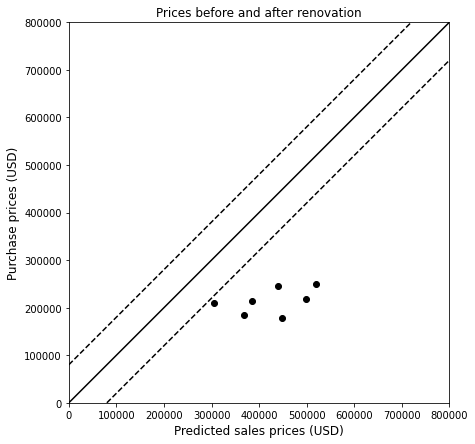

In [31]:
def target_features(data_business_new):
  target  = 'price'
  features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
             'zipcode','lat','long','in_city','basement','renovation','construction',
              'dayofweek','month','year','living_and_bathrooms','living_and_grade',
              'bathrooms_and_grade_and_living','season_Fall','season_Spring',
              'season_Summer','season_Winter']

  y_data = data_business_new[target]
  x_data = data_business_new[features]

  return y_data, x_data

def data_normalize(x_train, x_data):
  scale = MinMaxScaler().fit(x_train)
  x_data_scaled = scale.transform(x_data)

  return scale, x_data_scaled

def predict_values(estimator_lr_chosen, x_data_scaled):
  predictions_lr = estimator_lr_chosen.predict(x_data_scaled)

  return predictions_lr

def comparison_chart(data_business):
  plt.figure(figsize=(7,7))

  plt.axes().set_aspect('equal','box')
  plt.scatter(predictions_lr, data_business['price'], color = 'black')
  plt.plot((0, 800000), (0, 800000), 'k-')
  plt.plot((0, 720000), (80000, 800000), 'k--')
  plt.plot((80000, 800000), (0, 720000), 'k--')

  plt.xlim(0, 800000)
  plt.ylim(0, 800000)
  plt.title("Prices before and after renovation")
  plt.xlabel("Predicted sales prices (USD)", fontsize = 12)
  plt.ylabel("Purchase prices (USD)", fontsize = 12)

  plt.show()

  return None

if __name__ == '__main__':

  y_data, x_data = target_features(data_business_new)

  scale, x_data_scaled = data_normalize(x_train, x_data)

  predictions_lr = predict_values(estimator_lr_chosen, x_data_scaled)
  
  comparison_chart(data_business)

The price of each property exceeded the minimum profit margin of 10%. The profit values may be seen in the table of the next section. 

## 7.3. Financial Conclusions

The average price of 9000.00 dollars to add each bathroom was considered to calculate the cost and the profit. 

In [32]:
def total_price(data_business_new):
  tprice = data_business_new['price'].sum()

  return tprice

def renovation_cost(data_business_new):
  rprice = data_business_new.shape[0] * 9000 * 3 

  return rprice

def total_cost(tprice, rprice):
  tcost = tprice + rprice

  return tcost

def sales_price(predictions_lr):
  sprice = (predictions_lr).sum()

  return sprice

def profit_function(sprice, tcost):
  profit = sprice - tcost

  return profit

def financial_table(tprice, rprice, tcost, sprice, profit):
  financial = pd.DataFrame({'Total purchase cost (USD)': [],
                             'Total renovation cost (USD)': [],
                             'Total cost (USD)': [],
                             'Total sales price (USD)': [],
                             'Profit (USD)': [],
                             'Profit Percentage (%)': []})
  
  r = financial.shape[0]
  financial.loc[r] = [tprice, rprice, tcost, sprice, profit, (profit/tcost)*100]

  return financial, r

if __name__ == '__main__':
  tprice = total_price(data_business_new)

  rprice = renovation_cost(data_business_new)

  tcost = total_cost(tprice, rprice)

  sprice = sales_price(predictions_lr)

  profit = profit_function(sprice, tcost)

  financial, r = financial_table(tprice, rprice, tcost, sprice, profit)

In [33]:
financial

,Total purchase cost (USD),Total renovation cost (USD),Total cost (USD),Total sales price (USD),Profit (USD),Profit Percentage (%)
0,1502750.00,189000.00,1691750.00,2967040.00,1275290.00,75.38


An excellent profit percentage of 75.38% was achieved due to the insights and the machine learning model performance. 

# 8. Conclusions

It was reached a profit of $ 1,275,290.00 (75.38%) by choosing:

- 5-bedrooms properties. 
- Properties with less than 3 bathrooms.
- 9000.00 dollars as the cost to add each bathrooms. 
- Condition equals to or higher than 3.
- Properties with living area larger than 1900 ft².
- A limit price of 260000.00 dollars to purchase the properties.
- April as the month to resell the properties.
- A minimum profit margin of 10%. 
- No basement. 